# Fundamentals

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow.keras as keras
from PIL import Image
import tensorflow as tf
#import tensorflow_hub as hub
import cv2
import time
import pickle

from tensorflow.keras import models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv3D, MaxPooling3D, UpSampling2D, GlobalAveragePooling2D, AveragePooling2D, Conv2DTranspose
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras import backend as K

from sklearn.model_selection import learning_curve, train_test_split

In [2]:
plt.style.use('default')
plt.style.use('normal.mplstyle')

# load data

## 3D

### three wafers

#### load optical

In [3]:
# load optical
# interval = 2
path = f'input_optical_3D'

# train
wafer_list_bot = ['503', '507', '513', '518']
wafer_list_mid = ['505', '509', '515', '520']
wafer_list_top = ['507', '511', '517', '522']

datasets = len(wafer_list_bot)

x_train_load = []
for i in range(datasets):
    data_load = np.stack([np.array(Image.open(f'{path}/{wafer_list_bot[i]}_1.png')), 
                     np.array(Image.open(f'{path}/{wafer_list_mid[i]}_1.png')), 
                     np.array(Image.open(f'{path}/{wafer_list_top[i]}_1.png'))])
    x_train_load.append(data_load)

x_train_load = np.array(x_train_load)                              

# test
wafer_list_bot = ['509']
wafer_list_mid = ['511']
wafer_list_top = ['513']

datasets = len(wafer_list_bot)

x_test_load = []
for i in range(datasets):
    data_load = np.stack([np.array(Image.open(f'{path}/{wafer_list_bot[i]}_1.png')), 
                     np.array(Image.open(f'{path}/{wafer_list_mid[i]}_1.png')), 
                     np.array(Image.open(f'{path}/{wafer_list_top[i]}_1.png'))])
    x_test_load.append(data_load)
    
x_test_load = np.array(x_test_load)
                            
x_train_load.shape, x_test_load.shape

((4, 3, 500, 500), (1, 3, 500, 500))

#### load PL

In [4]:
path = f'G:K3_binary/twovalue/min0_dislength=10'

# train
#wafer_list_bot = ['503', '507', '516']
#wafer_list_mid = ['505', '509', '518']
#wafer_list_top = ['507', '511', '520']
wafer_list_top = ['507', '511', '517', '522']

datasets = len(wafer_list_top)

y_train_load = []
for i in range(int(datasets)):
    data_load = []
    data_load = [np.array(Image.open(f'{path}/{wafer_list_top[i]}.bmp'))]
    y_train_load.append(data_load)

y_train_load = np.array(y_train_load) 
                              
# test
# wafer_list_bot = ['509']
# wafer_list_mid = ['511']
wafer_list_top = ['513']

datasets = len(wafer_list_top)

y_test_load = []
for i in range(datasets):
    data_load = [np.array(Image.open(f'{path}/{wafer_list_top[i]}.bmp'))]
    y_test_load.append(data_load)     

y_test_load = np.array(y_test_load)
                              
y_train_load.shape, y_test_load.shape

((4, 1, 500, 500), (1, 1, 500, 500))

### multiple wafers

#### load optical

In [640]:
# load optical
# interval = 2
path = f'input_optical_3D'

# train
#wafer_list_bot = ['503', '507', '513', '518']
#wafer_list_mid = ['505', '509', '515', '520']

#9
#wafer_list_1 = ['502', '507', '513', '518', '528']
#wafer_list_2 = ['503', '509', '515', '520', '530']
#wafer_list_3 = ['505', '511', '517', '522', '532']
#wafer_list_4 = ['507', '513', '519', '523', '534']
#wafer_list_5 = ['509', '515', '521', '526', '536']
#wafer_list_6 = ['511', '517', '523', '528', '538']
#wafer_list_7 = ['513', '519', '526', '530', '540']
#wafer_list_8 = ['515', '521', '527', '532', '542']
#wafer_list_top = ['517', '523', '529', '534', '544']

#5_interval3
# wafer_list_1 = ['505', '511', '517', '522', '533']
# wafer_list_2 = ['508', '514', '520', '526', '535']
# wafer_list_3 = ['511', '517', '523', '528', '538']
# wafer_list_4 = ['514', '520', '526', '531', '541']
# wafer_list_top = ['517', '523', '529', '534', '544']

#5_interval10
wafer_list_1 = ['421', '441', '461', '481', '503']
wafer_list_2 = ['431', '452', '471', '491', '513']
wafer_list_3 = ['441', '461', '481', '502', '523']
wafer_list_4 = ['452', '471', '491', '511', '533']
wafer_list_top = ['461', '481', '502', '521', '543']

datasets = len(wafer_list_top)

x_train_load = []
for i in range(datasets):
    data_load = np.stack([np.array(Image.open(f'{path}/{wafer_list_1[i]}_1.png')), 
                     np.array(Image.open(f'{path}/{wafer_list_2[i]}_1.png')),
                     np.array(Image.open(f'{path}/{wafer_list_3[i]}_1.png')), 
                     np.array(Image.open(f'{path}/{wafer_list_4[i]}_1.png')), 
                     #np.array(Image.open(f'{path}/{wafer_list_5[i]}_1.png')), 
                     #np.array(Image.open(f'{path}/{wafer_list_6[i]}_1.png')), 
                     #np.array(Image.open(f'{path}/{wafer_list_7[i]}_1.png')), 
                     #np.array(Image.open(f'{path}/{wafer_list_8[i]}_1.png')), 
                     np.array(Image.open(f'{path}/{wafer_list_top[i]}_1.png'))])
    x_train_load.append(data_load)

x_train_load = np.array(x_train_load)                              

# test
#wafer_list_bot = ['509']
#wafer_list_mid = ['511']
#wafer_list_top = ['513']
#9
# wafer_list_1 = ['510', '523']
# wafer_list_2 = ['513', '526']
# wafer_list_3 = ['514', '528']
# wafer_list_4 = ['516', '530']
# wafer_list_5 = ['518', '532']
# wafer_list_6 = ['520', '534']
# wafer_list_7 = ['522', '536']
# wafer_list_8 = ['523', '538']
# wafer_list_top = ['526', '540']

#5
# wafer_list_1 = ['514', '528']
# wafer_list_2 = ['517', '531']
# wafer_list_3 = ['520', '534']
# wafer_list_4 = ['523', '537']
# wafer_list_top = ['526', '540']

#5
wafer_list_1 = ['261', '331']
wafer_list_2 = ['271', '341']
wafer_list_3 = ['281', '351']
wafer_list_4 = ['291', '361']
wafer_list_top = ['300', '371']

datasets = len(wafer_list_top)

x_test_load = []
for i in range(datasets):
    data_load = np.stack([np.array(Image.open(f'{path}/{wafer_list_1[i]}_1.png')), 
                     np.array(Image.open(f'{path}/{wafer_list_2[i]}_1.png')), 
                     np.array(Image.open(f'{path}/{wafer_list_3[i]}_1.png')), 
                     np.array(Image.open(f'{path}/{wafer_list_4[i]}_1.png')), 
                     #np.array(Image.open(f'{path}/{wafer_list_5[i]}_1.png')), 
                     #np.array(Image.open(f'{path}/{wafer_list_6[i]}_1.png')), 
                     #np.array(Image.open(f'{path}/{wafer_list_7[i]}_1.png')), 
                     #np.array(Image.open(f'{path}/{wafer_list_8[i]}_1.png')),
                     np.array(Image.open(f'{path}/{wafer_list_top[i]}_1.png'))])
    x_test_load.append(data_load)
    
x_test_load = np.array(x_test_load)
                            
x_train_load.shape, x_test_load.shape

((5, 5, 500, 500), (2, 5, 500, 500))

#### load PL

In [642]:
#path = f'G:K3_binary/twovalue/min0_dislength=10'
path = f'G:K3_binary/twovalue/min0'

# train
#wafer_list_bot = ['503', '507', '516']
#wafer_list_mid = ['505', '509', '518']
#wafer_list_top = ['507', '511', '520']
#wafer_list_top = ['507', '511', '517', '522']

#wafer_list_top = ['517', '523', '529', '534', '544']

wafer_list_top = ['461', '481', '502', '521', '543']

datasets = len(wafer_list_top)

y_train_load = []
for i in range(int(datasets)):
    data_load = []
    data_load = [np.array(Image.open(f'{path}/{wafer_list_top[i]}.bmp'))]
    y_train_load.append(data_load)

y_train_load = np.array(y_train_load) 
                              
# test
# wafer_list_bot = ['509']
# wafer_list_mid = ['511']
#wafer_list_top = ['513']

#wafer_list_top = ['526', '540']

wafer_list_top = ['301', '371']

datasets = len(wafer_list_top)

y_test_load = []
for i in range(datasets):
    data_load = [np.array(Image.open(f'{path}/{wafer_list_top[i]}.bmp'))]
    y_test_load.append(data_load)     

y_test_load = np.array(y_test_load)
                              
y_train_load.shape, y_test_load.shape

((5, 1, 500, 500, 3), (2, 1, 500, 500, 3))

In [6]:
# # load PL
# path = f'G:K3_binary/twovalue/min0_dislength=10'
# #train
# input_train = np.array(Image.open(f'{path}/507.bmp'))

# cx, cy = 0, 0
# blocks = 500
# labels = []
# for j in range(blocks):
#     for i in range (blocks):    
#         point = input_train[cx, cy]
#         cy = cy+1
        
#         #label = []
#         if point == 0:
#             label = 0
#             labels.append(label)
#         else:
#             label = 1
#             labels.append(label)
#     cy = 0    
#     cx = cx+1

# y_train_load_1 = np.array(labels).reshape(500,500)

# input_train = np.array(Image.open(f'{path}/511.bmp'))

# cx, cy = 0, 0
# blocks = 500
# labels = []
# for j in range(blocks):
#     for i in range (blocks):    
#         point = input_train[cx, cy]
#         cy = cy+1
        
#         #label = []
#         if point == 0:
#             label = 0
#             labels.append(label)
#         else:
#             label = 1
#             labels.append(label)
#     cy = 0    
#     cx = cx+1

# y_train_load_2 = np.array(labels).reshape(500,500)

# input_train = np.array(Image.open(f'{path}/520.bmp'))

# cx, cy = 0, 0
# blocks = 500
# labels = []
# for j in range(blocks):
#     for i in range (blocks):    
#         point = input_train[cx, cy]
#         cy = cy+1
        
#         #label = []
#         if point == 0:
#             label = 0
#             labels.append(label)
#         else:
#             label = 1
#             labels.append(label)
#     cy = 0    
#     cx = cx+1

# y_train_load_3 = np.array(labels).reshape(500,500)

# y_train_load = np.stack([y_train_load_1, y_train_load_2, y_train_load_3])

# #test
# input_test = np.array(Image.open(f'{path}/513.bmp'))

# cx, cy = 0, 0
# labels = []
# for j in range(blocks):
#     for i in range (blocks):    
#         point = input_test[cx, cy]
#         cy = cy+1
        
#         #label = []
#         if point == 0:
#             label = 0
#             labels.append(label)
#         else:
#             label = 1
#             labels.append(label)
#     cy = 0    
#     cx = cx+1

# y_test_load = np.array(labels).reshape(500,500)
# y_train_load.shape, y_test_load.shape


create x-optical data

### create images with slide inputs

optical
----(sets, stacks, indexes, im_size, im_size)

In [643]:
#train input
#slide
#settings
strides = 1
im_size = (101, 101)
blocks = int((500-im_size[0])/strides+1)
sets = x_train_load.shape[0]
stacks = x_train_load.shape[1]
dataset = []

print(blocks)

#create
for k in range(sets):
    stack = []
    for w in range(stacks):
        images_train = []
        cx,cy = 0,0
        for j in range(blocks):
            for i in range (blocks):    
                img = x_train_load[k, w, cx:cx+im_size[0], cy:cy+im_size[1]]
                #print(img.shape)
                images_train.append(img)
                cy = cy+strides        
            cy = 0    
            cx = cx+strides
        #print(np.array(images_train).shape)
        stack.append(images_train)    
        w = w+1
    dataset.append(stack)

#x_train = np.array(images_train)
x_train = np.array(dataset)
x_train.shape

400


(5, 5, 160000, 101, 101)

In [644]:
#test input
#settings
DC=False

strides = 1
blocks = int((500-im_size[0])/strides+1)
sets = x_test_load.shape[0] #データの数
stacks = x_test_load.shape[1] #成長方向にスタックする枚数
dataset = []

if DC==True:
    print(blocks)

    #create
    for k in range(sets):
        stack = []
        for w in range(stacks):
            images_test = []
            cx,cy = 0,0
            for j in range(blocks):
                for i in range (blocks):    
                    img = x_test_load[w, cx:cx+im_size[0], cy:cy+im_size[1]]
                    #print(img.shape)
                    images_test.append(img)
                    cy = cy+strides        
                cy = 0    
                cx = cx+strides
            #print(np.array(images_test).shape)
            stack.append(images_test)    
            w = w+1 
        dataset.append(stack)
        
    #x_train = np.array(images_train)
    dcs = np.array(dataset).reshape(3, 3, 401, 401, 100, 100)
    dcs = dcs[:, 301:, 301:, :, :]
    x_test = np.array(dcs).reshape(3, 3, 10000, 100, 100)
    print(x_test.shape)



if DC==False:
    print(blocks)

    #create
    for k in range(sets):
        stack = []
        for w in range(stacks):
            images_test = []
            cx,cy = 0,0
            for j in range(blocks):
                for i in range (blocks):    
                    img = x_test_load[k, w, cx:cx+im_size[0], cy:cy+im_size[1]]
                    #print(img.shape)
                    images_test.append(img)
                    cy = cy+strides        
                cy = 0    
                cx = cx+strides
            #print(np.array(images_test).shape)
            stack.append(images_test)    
            w = w+1
        dataset.append(stack)

    #x_train = np.array(images_train)
    x_test = np.array(dataset)
    print(x_test.shape)

400
(2, 5, 160000, 101, 101)


create y-PLdata
---(sets, stacks, im_size, im_size)

In [645]:
y_train_load.shape, y_test_load.shape

((5, 1, 500, 500, 3), (2, 1, 500, 500, 3))

In [646]:
#train labels
wafer_sets = y_train_load.shape[0]
stacks = y_train_load.shape[1]
dataset = []
strides = 1
blocks = int((500-im_size[0])/strides+1)

for k in range(wafer_sets):
    stack = []
    for w in range(stacks):
        labels_train = []
        cx,cy = int(im_size[0]/2),int(im_size[1]/2)
        for j in range(blocks):
            for i in range (blocks):    
                label = y_train_load[k, w, cx, cy]
                #print(img.shape)
                labels_train.append(label)
                cy = cy+strides        
            cy = int(im_size[1]/2)    
            cx = cx+strides
        #print(np.array(labels_train).shape)
        stack.append(labels_train)    
        w = w+1
    dataset.append(stack)
    
y_train = np.array(dataset)
y_train.shape

(5, 1, 160000, 3)

In [647]:
#test labels
wafer_sets = y_test_load.shape[0]
stacks = y_test_load.shape[1]
dataset = []
strides = 1
blocks = int((500-im_size[0])/strides+1)

if DC==True:
    for w in range(wafer_sets):
        labels_test = []
        cx,cy = int(im_size[0]/2),int(im_size[1]/2)
        for j in range(blocks):
            for i in range (blocks):    
                label = y_test_load[w, cx, cy]
                #print(img.shape)
                labels_test.append(label)
                cy = cy+strides        
            cy = int(im_size[1]/2)    
            cx = cx+strides
        #print(np.array(labels_train).shape)
        dataset.append(labels_test)    
        w = w+1
        #print(np.array(dataset).shape)
    
    dcs = np.array(dataset).reshape(2, 401, 401)
    dcs = dcs[:, 301:, 301:]
    y_test = np.array(dcs).reshape(2, 10000)
    print(y_test.shape)
   

if DC==False:
    for k in range(wafer_sets):
        stack = []
        for w in range(stacks):
            labels_test = []
            cx,cy = int(im_size[0]/2),int(im_size[1]/2)
            for j in range(blocks):
                for i in range (blocks):    
                    label = y_test_load[k, w, cx, cy]
                    #print(img.shape)
                    labels_test.append(label)
                    cy = cy+strides        
                cy = int(im_size[1]/2)    
                cx = cx+strides
            #print(np.array(labels_train).shape)
            stack.append(labels_test)    
            w = w+1
        dataset.append(stack)

    y_test = np.array(dataset)
    print(y_test.shape)

(2, 1, 160000, 3)


In [649]:
#check shape
print(x_train.shape, x_test.shape, y_train[:,:,:,0].shape, y_test[:,:,:,0].shape)

(5, 5, 160000, 101, 101) (2, 5, 160000, 101, 101) (5, 1, 160000) (2, 1, 160000)


In [651]:
np.count_nonzero(y_test[0,:,:,0])

1047

### save data (required to navigate around memoryerror)

In [652]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

np.save('npy_3D/int10/x_train.npy', x_train)
np.save('npy_3D/int10/x_test.npy', x_test)
np.save('npy_3D/int10/y_train.npy', y_train[:,:,:,0])
np.save('npy_3D/int10/y_test.npy', y_test[:,:,:,0])

(5, 5, 160000, 101, 101) (2, 5, 160000, 101, 101) (5, 1, 160000, 3) (2, 1, 160000, 3)


### prepare data for training (normalization)

normalization

In [3]:
x_train = np.load('npy_3D/int10/x_train.npy')
x_test = np.load('npy_3D/int10/x_test.npy')
y_train = np.load('npy_3D/int10/y_train.npy')
y_test = np.load('npy_3D/int10/y_test.npy')

In [4]:
np.max(y_train)

255

In [5]:
y_train = y_train/255
y_test = y_test/255

DA

### reduce bias 

In [60]:
"""""
x_opt(reduced_indices, im_size, im_size, stacks)
y_PL(reduced_indices, stacks)
"""""

'""\nx_opt(reduced_indices, im_size, im_size, stacks)\ny_PL(reduced_indices, stacks)\n'

In [6]:
np.count_nonzero(y_train), np.count_nonzero(y_test)

(6354, 2346)

In [7]:
sets = x_train.shape[0]
stacks = x_train.shape[1]
indx_train = x_train.shape[2]
indices = sets*indx_train
print('number of indices = ', indices)

"""""
x --- (sets, stacks, indices, im_size, im_size)
y --- (sets, stacks, indices)
transpose to create shape x(sets, indices, im_size, im_size, stacks), y(sets, indices, stacks)

"""""
# transpose
sample = x_train.transpose(0, 2, 3, 4, 1)
label = y_train.transpose(0, 2, 1)
print(sample.shape, label.shape)

number of indices =  800000
(5, 160000, 101, 101, 5) (5, 160000, 1)


In [8]:

# reshape
#sample = sample.reshape(indices, 101, 101, stacks)
#label = label.reshape(indices, 1)
print(sample.shape, label.shape)



#labels = []
#samples = []

labs = []
sams = []

for j in range(sets):
    labels = []
    samples = []
    
    spe_label = label[j]
    #print(spe_sample.shape)
    spe_sample = sample[j]
    for i in range(indx_train):
        if spe_label[i] == 1:
            labels.append(spe_label[i])
            samples.append(spe_sample[i])
        else:
            red_rate = np.random.randint(1,50)
            if red_rate == 1:
                labels.append(spe_label[i])
                samples.append(spe_sample[i])
            else:
                labels = labels
                samples = samples
    print(np.array(samples).shape)
    
    
    sams.append(samples)
    labs.append(labels)
       

(5, 160000, 101, 101, 5) (5, 160000, 1)
(4352, 101, 101, 5)
(4676, 101, 101, 5)
(4234, 101, 101, 5)
(4350, 101, 101, 5)
(4854, 101, 101, 5)


In [9]:
print(np.array(sams[0]).shape, np.array(sams[1]).shape)

(4352, 101, 101, 5) (4676, 101, 101, 5)


In [10]:
sams1 = np.array(sams[0])
sams2 = np.array(sams[1])
sams3 = np.array(sams[2])
sams4 = np.array(sams[3])
sams5 = np.array(sams[4])

samples = np.concatenate([sams1, sams2, sams3, sams4, sams5], axis=0)
samples.shape

(22466, 101, 101, 5)

In [11]:
labs1 = np.array(labs[0])
labs2 = np.array(labs[1])
labs3 = np.array(labs[2])
labs4 = np.array(labs[3])
labs5 = np.array(labs[4])

labels = np.concatenate([labs1, labs2, labs3, labs4, labs5], axis=0)
labels.shape

(22466, 1)

dont use!!!!!

In [25]:
sets = x_train.shape[0]
stacks = x_train.shape[1]
indx_train = x_train.shape[2]
indices = sets*indx_train
print('number of indices = ', indices)

"""""
x --- (sets, stacks, indices, im_size, im_size)
y --- (sets, stacks, indices)
transpose to create shape x(sets, indices, im_size, im_size, stacks), y(sets, indices, stacks)

"""""
# transpose
sample = x_train.transpose(0, 2, 3, 4, 1)
label = y_train.transpose(0, 2, 1)
print(sample.shape, label.shape)

# reshape
sample = sample.reshape(indices, 101, 101, stacks)
label = label.reshape(indices, 1)
print(sample.shape, label.shape)

labels = []
samples = []

for i in range(sets*indx_train):
    if label[i] == 1:
        labels.append(label[i])
        samples.append(sample[i])
    else:
        red_rate = np.random.randint(1,50)
        if red_rate == 1:
            labels.append(label[i])
            samples.append(sample[i])
        else:
            labels = labels
            samples = samples

labels = np.array(labels) 
samples = np.array(samples)
print(labels.shape, samples.shape)        

number of indices =  800000
(5, 160000, 101, 101, 5) (5, 160000, 1)
(800000, 101, 101, 5) (800000, 1)
(21499, 1) (21499, 101, 101, 5)


In [12]:
np.count_nonzero(label)

6354

In [13]:
np.count_nonzero(labels)

6354

### check

In [15]:
x_train = samples
y_train = labels

In [14]:
x_test.shape, y_test.shape

((2, 5, 160000, 101, 101), (2, 1, 160000))

In [16]:
"""
for sets==1.
change when increasing test data.
"""
# ignore sets
x_test_1 = x_test[0]
y_test_1 = y_test[0]
print(x_test.shape, y_test.shape)

x_test_1 = x_test_1.transpose(1, 2, 3, 0)
y_test_1 = y_test_1.transpose(1, 0)

print(x_test_1.shape, y_test_1.shape)

x_test_2 = x_test[1]
y_test_2 = y_test[1]
print(x_test.shape, y_test.shape)

x_test_2 = x_test_2.transpose(1, 2, 3, 0)
y_test_2 = y_test_2.transpose(1, 0)

print(x_test_2.shape, y_test_2.shape)

x_test = np.concatenate([x_test_1, x_test_2], axis=0)
y_test = np.concatenate([y_test_1, y_test_2], axis=0)

print(x_test.shape, y_test.shape)
# x_test = x_test.reshape(160000, 101, 101, 3)
# y_test = y_test.reshape(160000, 1)

(2, 5, 160000, 101, 101) (2, 1, 160000)
(160000, 101, 101, 5) (160000, 1)
(2, 5, 160000, 101, 101) (2, 1, 160000)
(160000, 101, 101, 5) (160000, 1)
(320000, 101, 101, 5) (320000, 1)


In [17]:
#check shape
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(22466, 101, 101, 5) (320000, 101, 101, 5) (22466, 1) (320000, 1)


In [20]:
## for backup
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

np.save('npy_3D/reduced/int10/x_train.npy', x_train)
np.save('npy_3D/reduced/int10/y_train.npy', y_train)

(22466, 101, 101, 5) (320000, 101, 101, 5) (22466, 1) (320000, 1)


In [21]:
np.save('npy_3D/reduced/int10/x_test.npy', x_test)

In [22]:
np.save('npy_3D/reduced/int10/y_test.npy', y_test)

### DA 

In [3]:
x_train = np.load('npy_3D/reduced/int10/x_train.npy')
x_test = np.load('npy_3D/reduced/int10/x_test.npy')
y_train = np.load('npy_3D/reduced/int10/y_train.npy')
y_test = np.load('npy_3D/reduced/int10/y_test.npy')

In [4]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(22466, 101, 101, 5) (320000, 101, 101, 5) (22466, 1) (320000, 1)


In [5]:
sets = x_train.shape[0]
stacks = x_train.shape[3]
#indx_train = x_train.shape[2]
#indices = sets*indx_train

In [6]:
stacks

5

In [7]:
wafer_counts = x_train.shape[0]
aug_data = []

for i in range(wafer_counts):
    #rotation *4 for set of wafers
    smp_1 = x_train[i, :, :, 0] 
    smp_2 = x_train[i, :, :, 1] 
    smp_3 = x_train[i, :, :, 2]
    smp_4 = x_train[i, :, :, 3]
    smp_5 = x_train[i, :, :, 4]
    #smp_6 = x_train[i, :, :, 5]
    #smp_7 = x_train[i, :, :, 6]
    #smp_8 = x_train[i, :, :, 7]
    #smp_9 = x_train[i, :, :, 8]#top
    
    #smp_rot0 = np.stack((smp_1, smp_2, smp_3, smp_4, smp_5, smp_6, smp_7, smp_8, smp_9), axis=0)
    smp_rot0 = np.stack((smp_1, smp_2, smp_3, smp_4, smp_5), axis=0)
    
    
    smp_rot90 = np.stack(((cv2.rotate(smp_1, cv2.ROTATE_90_CLOCKWISE)),
                         (cv2.rotate(smp_2, cv2.ROTATE_90_CLOCKWISE)),
                         (cv2.rotate(smp_3, cv2.ROTATE_90_CLOCKWISE)),
                         (cv2.rotate(smp_4, cv2.ROTATE_90_CLOCKWISE)),
                         (cv2.rotate(smp_5, cv2.ROTATE_90_CLOCKWISE))#,
                         #(cv2.rotate(smp_6, cv2.ROTATE_90_CLOCKWISE)),
                         #(cv2.rotate(smp_7, cv2.ROTATE_90_CLOCKWISE)),
                         #(cv2.rotate(smp_8, cv2.ROTATE_90_CLOCKWISE)),
                         #(cv2.rotate(smp_9, cv2.ROTATE_90_CLOCKWISE))
                         ), axis=0)
    
    smp_rot180 = np.stack(((cv2.rotate(smp_1, cv2.ROTATE_180)),
                          (cv2.rotate(smp_2, cv2.ROTATE_180)),
                          (cv2.rotate(smp_3, cv2.ROTATE_180)),
                          (cv2.rotate(smp_4, cv2.ROTATE_180)),
                          (cv2.rotate(smp_5, cv2.ROTATE_180))#,
                          #(cv2.rotate(smp_6, cv2.ROTATE_180)),
                          #(cv2.rotate(smp_7, cv2.ROTATE_180)),
                          #(cv2.rotate(smp_8, cv2.ROTATE_180)),
                          #(cv2.rotate(smp_9, cv2.ROTATE_180))
                          ), axis=0)
    
    smp_rot270 = np.stack(((cv2.rotate(smp_1, cv2.ROTATE_90_COUNTERCLOCKWISE)),
                          (cv2.rotate(smp_2, cv2.ROTATE_90_COUNTERCLOCKWISE)),
                          (cv2.rotate(smp_3, cv2.ROTATE_90_COUNTERCLOCKWISE)),
                          (cv2.rotate(smp_4, cv2.ROTATE_90_COUNTERCLOCKWISE)),
                          (cv2.rotate(smp_5, cv2.ROTATE_90_COUNTERCLOCKWISE))#,
                          #(cv2.rotate(smp_6, cv2.ROTATE_90_COUNTERCLOCKWISE)),
                          #(cv2.rotate(smp_7, cv2.ROTATE_90_COUNTERCLOCKWISE)),
                          #(cv2.rotate(smp_8, cv2.ROTATE_90_COUNTERCLOCKWISE)),
                          #(cv2.rotate(smp_9, cv2.ROTATE_90_COUNTERCLOCKWISE))
                          ), axis=0)
    
    smps = np.stack((smp_rot0, smp_rot90, smp_rot180, smp_rot270), axis=0)
    #print(smps.shape)
    aug_data.append(smps)

print(np.array(aug_data).shape) 
#x_train = np.array(aug_data).reshape(wafer_counts*4, 9, 101, 101)
x_train = np.array(aug_data).reshape(wafer_counts*4, 5, 101, 101)
x_train = x_train.transpose(0, 2, 3, 1)

(22466, 4, 5, 101, 101)


In [8]:
aug_labels =[]

for i in range(wafer_counts):
    label = y_train[i]
    labels = np.stack((label, label, label, label), axis=0)
    
    aug_labels.append(labels)
    
print(np.array(aug_labels).shape)
y_train = np.array(aug_labels).reshape(wafer_counts*4, 1)
print(y_train.shape)
    

(22466, 4, 1)
(89864, 1)


In [9]:
print(x_train.shape, y_train.shape)

(89864, 101, 101, 5) (89864, 1)


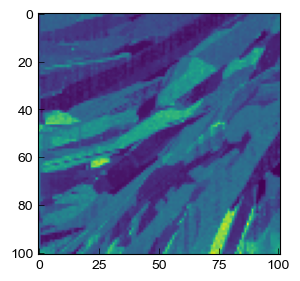

In [10]:
plt.imshow(x_train[3,:,:,0])

### pass data to inputs

In [8]:
#x_train = x_train[:,:,:,:5]
#x_test = x_test[:,:,:,:5]

In [11]:
print(x_train.shape, y_train.shape)

(89864, 101, 101, 5) (89864, 1)


In [12]:
x_test.shape

(320000, 101, 101, 5)

In [13]:
x_input = x_train
y_input = y_train

### show

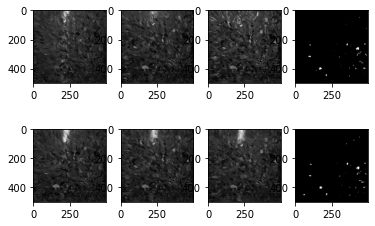

In [8]:

imgplot=1
plt.subplot(2,4,imgplot)
plt.imshow(x_train[:,:,0], cmap='gray')

imgplot=2
plt.subplot(2,4,imgplot)
plt.imshow(x_train[:,:,1], cmap='gray')

imgplot=3
plt.subplot(2,4,imgplot)
plt.imshow(x_train[:,:,2], cmap='gray')

imgplot=4
plt.subplot(2,4,imgplot)
plt.imshow(y_train, cmap='gray')

imgplot=5
plt.subplot(2,4,imgplot)
plt.imshow(x_test[:,:,0], cmap='gray')

imgplot=6
plt.subplot(2,4,imgplot)
plt.imshow(x_test[:,:,1], cmap='gray')

imgplot=7
plt.subplot(2,4,imgplot)
plt.imshow(x_test[:,:,2], cmap='gray')

imgplot=8
plt.subplot(2,4,imgplot)
plt.imshow(y_test, cmap='gray')

## 2D

In [339]:
#2D data
opt_path = f'input_optical'
pl_path =  f'G:K3_binary/twovalue/min0_dislength=10'

#wafer_set = [526,529]
wafer_train = [502,506,509,513,516,519,523,526,541]
wafer_test = [505, 529]

#x_train = np.stack([np.array(Image.open(f'{opt_path}/{wafer_set[0]}_1.png')),
#                   np.array(Image.open(f'{opt_path}/{wafer_set[1]}_1.png')),
#                   np.array(Image.open(f'{opt_path}/{wafer_set[2]}_1.png'))])


x_train_load = np.stack([np.array(Image.open(f'{opt_path}/{wafer_train[i]}_1.png')) for i in range(len(wafer_train))])
x_test_load = np.stack([np.array(Image.open(f'{opt_path}/{wafer_test[i]}_1.png')) for i in range(len(wafer_test))])


y_train_load = np.stack([np.array(Image.open(f'{pl_path}/{wafer_train[i]}.bmp')) for i in range(len(wafer_train))])
y_test_load = np.stack([np.array(Image.open(f'{pl_path}/{wafer_test[i]}.bmp')) for i in range(len(wafer_test))])


In [340]:
x_train_load.shape, y_train_load.shape, x_test_load.shape, y_test_load.shape

((9, 500, 500), (9, 500, 500), (2, 500, 500), (2, 500, 500))

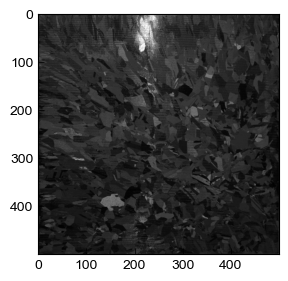

In [341]:
plt.imshow(x_train_load[0], cmap='gray')

### dont use

In [224]:
#batch_size = 500
#classes = ['yes','no']
num_classes = 2
epochs = 10

batches = 3

im_size = 500,500
img_rows, img_cols = im_size[0], im_size[1]
print(img_rows,img_cols,batches)

#change input_shape[2] for multichannel training
#input_shape = (200, 200, 1)

500 500 3


In [225]:
#reshape data suitable for training
print(x_train.shape, y_train.shape)

x_train = x_train.reshape(batches, img_rows, img_cols, 1)
x_test = x_test.reshape(1, img_rows, img_cols, 1)

y_train = y_train.reshape(batches, img_rows, img_cols)
y_test = y_test.reshape(1, img_rows, img_cols)

print(x_train.shape, y_train.shape)

(3, 500, 500) (3, 500, 500)
(3, 500, 500, 1) (3, 500, 500)


### for CNN slide inputs

100*100 images

In [342]:
x_train_load.shape, y_train_load.shape, x_test_load.shape, y_test_load.shape

((9, 500, 500), (9, 500, 500), (2, 500, 500), (2, 500, 500))

In [343]:
#train input
#settings
strides = 1
im_size = (101, 101)
blocks = int((500-im_size[0])/strides+1)
wafers = x_train_load.shape[0]
dataset = []

print(blocks, wafers)

#create
for w in range(wafers):
    images_train = []
    cx,cy = 0,0
    for j in range(blocks):
        for i in range (blocks):    
            img = x_train_load[w, cx:cx+im_size[0], cy:cy+im_size[1]]
            #print(img.shape)
            images_train.append(img)
            cy = cy+strides        
        cy = 0    
        cx = cx+strides
    #print(np.array(images_train).shape)
    dataset.append(images_train)    
    w = w+1

#x_train = np.array(images_train)
x_train = np.array(dataset)
x_train.shape

400 9


(9, 160000, 101, 101)

In [344]:
#train labels

dataset = []

for w in range(wafers):
    labels_train = []
    cx,cy = int(im_size[0]/2),int(im_size[1]/2)
    for j in range(blocks):
        for i in range (blocks):    
            label = y_train_load[w, cx, cy]
            #print(img.shape)
            labels_train.append(label)
            cy = cy+strides        
        cy = int(im_size[1]/2)    
        cx = cx+strides
    #print(np.array(labels_train).shape)
    dataset.append(labels_train)    
    w = w+1
    
y_train = np.array(dataset)
y_train.shape

(9, 160000)

test data ---- use original wafer! strides=1. 
if DC==True, use DC-dense area.
if False, use whole wafer.

In [345]:
#test input
#settings
DC=False

strides = 1
blocks = int((500-im_size[0])/strides+1)
wafers = x_test_load.shape[0]
dataset = []

if DC==True:
    print(blocks, wafers)

    #create
    for w in range(wafers):
        images_test = []
        cx,cy = 0,0
        for j in range(blocks):
            for i in range (blocks):    
                img = x_test_load[w, cx:cx+im_size[0], cy:cy+im_size[1]]
                #print(img.shape)
                images_test.append(img)
                cy = cy+strides        
            cy = 0    
            cx = cx+strides
        #print(np.array(images_test).shape)
        dataset.append(images_test)    
        w = w+1 
        
    #x_train = np.array(images_train)
    dcs = np.array(dataset).reshape(2, 401, 401, 100, 100)
    dcs = dcs[:, 301:, 301:, :, :]
    x_test = np.array(dcs).reshape(2, 10000, 100, 100)
    print(x_test.shape)



if DC==False:
    print(blocks, wafers)

    #create
    for w in range(wafers):
        images_test = []
        cx,cy = 0,0
        for j in range(blocks):
            for i in range (blocks):    
                img = x_test_load[w, cx:cx+im_size[0], cy:cy+im_size[1]]
                #print(img.shape)
                images_test.append(img)
                cy = cy+strides        
            cy = 0    
            cx = cx+strides
        #print(np.array(images_test).shape)
        dataset.append(images_test)    
        w = w+1

    #x_train = np.array(images_train)
    x_test = np.array(dataset)
    print(x_test.shape)

400 2
(2, 160000, 101, 101)


In [346]:
#test labels

dataset = []

if DC==True:
    for w in range(wafers):
        labels_test = []
        cx,cy = int(im_size[0]/2),int(im_size[1]/2)
        for j in range(blocks):
            for i in range (blocks):    
                label = y_test_load[w, cx, cy]
                #print(img.shape)
                labels_test.append(label)
                cy = cy+strides        
            cy = int(im_size[1]/2)    
            cx = cx+strides
        #print(np.array(labels_train).shape)
        dataset.append(labels_test)    
        w = w+1
        #print(np.array(dataset).shape)
    
    dcs = np.array(dataset).reshape(2, 401, 401)
    dcs = dcs[:, 301:, 301:]
    y_test = np.array(dcs).reshape(2, 10000)
    print(y_test.shape)
   

if DC==False:
    for w in range(wafers):
        labels_test = []
        cx,cy = int(im_size[0]/2),int(im_size[1]/2)
        for j in range(blocks):
            for i in range (blocks):    
                label = y_test_load[w, cx, cy]
                #print(img.shape)
                labels_test.append(label)
                cy = cy+strides        
            cy = int(im_size[1]/2)    
            cx = cx+strides
        #print(np.array(labels_train).shape)
        dataset.append(labels_test)    
        w = w+1

    y_test = np.array(dataset)
    print(y_test.shape)

(2, 160000)


#### check

In [347]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9, 160000, 101, 101), (9, 160000), (2, 160000, 101, 101), (2, 160000))

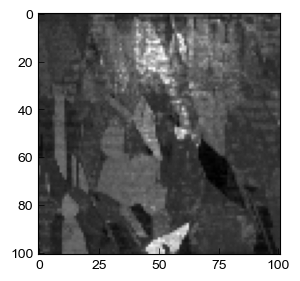

In [11]:
plt.imshow(x_train[4, 169, :, :], cmap='gray')

#### prepare data for training

normalize

In [348]:
# normalization
y_train = y_train/255
y_test = y_test/255

In [349]:
np.max(y_train)

1.0

reshape

In [350]:
reshape_seed_train = x_train.shape[0]*x_train.shape[1]
reshape_seed_test = x_test.shape[0]*x_test.shape[1]
reshape_seed_train, reshape_seed_test

(1440000, 320000)

In [351]:
x_train = x_train.reshape(reshape_seed_train, 101, 101, 1)
y_train = y_train.reshape(reshape_seed_train, 1)
x_test = x_test.reshape(reshape_seed_test, 101, 101, 1)
y_test = y_test.reshape(reshape_seed_test, 1)

In [352]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1440000, 101, 101, 1), (1440000, 1), (320000, 101, 101, 1), (320000, 1))

In [353]:
np.count_nonzero(y_test)

1895

bias reduction by creating indices

In [354]:
np.count_nonzero(y_train_load)

11446

In [355]:
np.count_nonzero(y_train)

8848

In [356]:
indx_train = y_train.shape[0]
print('number of indices = ', indx_train)

sample = x_train
label = y_train

labels = []
samples = []

for i in range(indx_train):
    if label[i] == 1:
        labels.append(label[i])
        samples.append(sample[i])
    else:
        red_rate = np.random.randint(1,50)
        if red_rate == 1:
            labels.append(label[i])
            samples.append(sample[i])
        else:
            labels = labels
            samples = samples

labels = np.array(labels) 
samples = np.array(samples)
print(labels.shape, samples.shape)        

number of indices =  1440000
(38037, 1) (38037, 101, 101, 1)


In [357]:
np.count_nonzero(labels)

8848

In [358]:
x_train = samples
y_train = labels

In [359]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38037, 101, 101, 1), (38037, 1), (320000, 101, 101, 1), (320000, 1))

### DA

In [360]:
wafer_counts = x_train.shape[0]
aug_data = []

for i in range(wafer_counts):
    #rotation *4 for set of wafers
    smp = x_train[i] #top
    
    smp_rot0 = smp.reshape(101,101)
    smp_rot90 = cv2.rotate(smp, cv2.ROTATE_90_CLOCKWISE)
    smp_rot180 = cv2.rotate(smp, cv2.ROTATE_180)
    smp_rot270 = cv2.rotate(smp, cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    smps = np.stack((smp_rot0, smp_rot90, smp_rot180, smp_rot270), axis=0)
    #print(smps.shape)
    aug_data.append(smps)

print(np.array(aug_data).shape) 
x_train = np.array(aug_data).reshape(wafer_counts*4, 1, 101, 101)
x_train = x_train.transpose(0, 2, 3, 1)

(38037, 4, 101, 101)


In [361]:
x_train.shape

(152148, 101, 101, 1)

In [362]:
# labels
aug_labels =[]

for i in range(wafer_counts):
    label = y_train[i]
    labels = np.stack((label, label, label, label), axis=0)
    
    aug_labels.append(labels)
    
print(np.array(aug_labels).shape)
y_train = np.array(aug_labels).reshape(wafer_counts*4, 1)
print(y_train.shape)

(38037, 4, 1)
(152148, 1)


### pass data to inputs

In [363]:
x_input = x_train
y_input = y_train

## Data for FCN

100*100 data

In [7]:
x_train_load.shape

(9, 500, 500)

In [8]:
# for train, take two 100*100 blocks
x_train = np.vstack([x_train_load[:, 300:400, 400:],x_train_load[:, 400:, 400:],x_train_load[:, 200:300, 400:],x_train_load[:, 390:490, 120:220]])
y_train = np.vstack([y_train_load[:, 300:400, 400:],y_train_load[:, 400:, 400:],y_train_load[:, 200:300, 400:],y_train_load[:, 390:490, 120:220]])

# for test, 
x_test = np.vstack([x_test_load[:, 300:400, 400:],x_test_load[:, 400:, 400:],x_test_load[:, 200:300, 400:],x_test_load[:, 390:490, 120:220]])
y_test = np.vstack([y_test_load[:, 300:400, 400:],y_test_load[:, 400:, 400:],y_test_load[:, 200:300, 400:],y_test_load[:, 390:490, 120:220]])

y_train = y_train/255
y_test = y_test/255

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((36, 100, 100), (36, 100, 100), (8, 100, 100), (8, 100, 100))

In [9]:
x_train = x_train.reshape(36, 100, 100, 1)
y_train = y_train.reshape(36, 1, 1, 10000)

x_test = x_test.reshape(8, 100, 100, 1)
y_test = y_test.reshape(8, 1, 1, 10000)

## Check data

In [326]:
x_test.shape, y_test.shape

((320000, 101, 101, 1), (320000, 1))

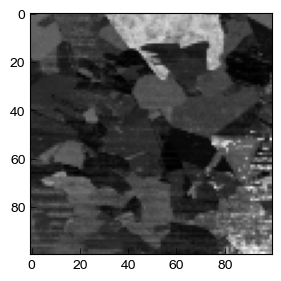

In [533]:
plt.imshow(x_test[],cmap='gray')

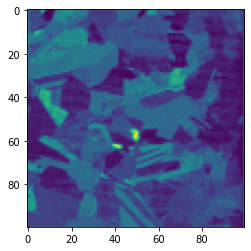

In [329]:
plt.imshow(x_test[0])

In [332]:
y_test.shape

(2, 160000)

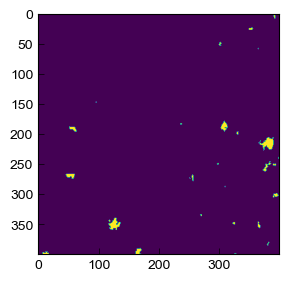

In [337]:
im_2 = y_test_2.reshape(2, 400, 400)
plt.imshow(im_2[1])

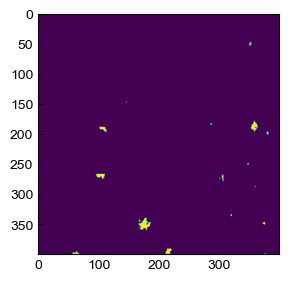

In [330]:
im = y_test.reshape(2, 400, 400)
plt.imshow(im[1])

# Model

## CNN

### 2D

In [364]:
#batch_size = 500
#classes = ['yes','no']
num_classes = 1
#epochs = 20
epochs=5
batches = 256

#im_size = 200,200
#img_rows, img_cols = im_size[0], im_size[1]
#print(img_rows,img_cols,batches)

#change input_shape[2] for multichannel training
input_shape = (101, 101, 1)

In [365]:
model = Sequential()

#1
model.add(Conv2D(20, kernel_size=(9, 9), 
                activation = 'relu',
                input_shape = input_shape,
                padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#2
model.add(Conv2D(50, kernel_size=(9, 9),
                activation = 'relu',
                padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#3
model.add(Conv2D(100, kernel_size=(3, 3),
                activation = 'relu',
                padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Flatten, Dense
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

#Output
model.add(Dense(num_classes, activation='sigmoid'))

#summarize
model.summary()
tf.keras.backend.clear_session()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 93, 93, 20)        1640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 20)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 46, 46, 20)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 50)        81050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 50)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 19, 19, 50)        0

### 2D multichannel

### 3D double layer

In [28]:
#batch_size = 500
#classes = ['yes','no']
num_classes = 1
epochs = 30
batches = 256

#im_size = 200,200
#img_rows, img_cols = im_size[0], im_size[1]
#print(img_rows,img_cols,batches)

#change input_shape[2] for multichannel training
input_shape = (101, 101, 3, 1)

In [29]:
model = Sequential()

#1
model.add(Conv3D(30, kernel_size=(9, 9, 3), 
                activation = 'relu',
                input_shape = input_shape,
                padding = 'same'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.25))

#2
model.add(Conv3D(100, kernel_size=(9, 9, 1),
                activation = 'relu',
                padding = 'valid'))
#model.add(MaxPooling3D(pool_size=(2, 2, 1)))
#model.add(Dropout(0.25))

#3
# model.add(Conv3D(100, kernel_size=(5, 5, 1),
#                  activation = 'relu',
#                  padding = 'valid'))
#model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(Dropout(0.25))

#Flatten, Dense
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))

#Output
model.add(Dense(num_classes, activation='sigmoid'))

#summarize
model.summary()
tf.keras.backend.clear_session()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 101, 101, 3, 30)   7320      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 50, 50, 1, 30)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 1, 30)     0         
                                                                 
 conv3d_1 (Conv3D)           (None, 42, 42, 1, 100)    243100    
                                                                 
 flatten (Flatten)           (None, 176400)            0         
                                                                 
 dense (Dense)               (None, 20)                3528020   
                                                        

### 3D triple layer

In [14]:
#batch_size = 500
#classes = ['yes','no']
num_classes = 1
epochs = 30
batches = 116

#im_size = 200,200
#img_rows, img_cols = im_size[0], im_size[1]
#print(img_rows,img_cols,batches)

#change input_shape[2] for multichannel training
input_shape = (101, 101, 5, 1)

In [15]:
model = Sequential()

#1
model.add(Conv3D(20, kernel_size=(9, 9, 1), 
                activation = 'relu',
                input_shape = input_shape,
                padding = 'valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 1)))
model.add(Dropout(0.25))

#2
model.add(Conv3D(50, kernel_size=(9, 9, 5),
                activation = 'relu',
                padding = 'valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 1)))
model.add(Dropout(0.25))

#3
model.add(Conv3D(100, kernel_size=(5, 5, 1),
                 activation = 'relu',
                 padding = 'valid'))

#Flatten, Dense
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))

#Output
model.add(Dense(num_classes, activation='sigmoid'))

#summarize
model.summary()
tf.keras.backend.clear_session()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 93, 93, 5, 20)     1640      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 46, 46, 5, 20)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 46, 46, 5, 20)     0         
                                                                 
 conv3d_1 (Conv3D)           (None, 38, 38, 1, 50)     405050    
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 19, 19, 1, 50)    0         
 3D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 19, 19, 1, 50)     0

### 3D-no pooling

In [445]:
#batch_size = 500
#classes = ['yes','no']
num_classes = 1
epochs = 5
batches = 256

#im_size = 200,200
#img_rows, img_cols = im_size[0], im_size[1]
#print(img_rows,img_cols,batches)

#change input_shape[2] for multichannel training
input_shape = (101, 101, 3, 1)

In [32]:
model = Sequential()

#1
model.add(Conv3D(30, kernel_size=(9, 9, 3), 
                activation = 'relu',
                input_shape = input_shape,
                padding = 'same'))
#model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.25))

#2
model.add(Conv3D(50, kernel_size=(9, 9, 1),
                activation = 'relu',
                padding = 'same'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(Dropout(0.25))

#3
model.add(Conv3D(100, kernel_size=(5, 5, 1),
                 activation = 'relu',
                 padding = 'valid'))
# model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.25))

#Flatten, Dense
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))

#Output
model.add(Dense(num_classes, activation='sigmoid'))

#summarize
model.summary()
tf.keras.backend.clear_session()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 101, 101, 3, 30)   7320      
                                                                 
 dropout (Dropout)           (None, 101, 101, 3, 30)   0         
                                                                 
 conv3d_1 (Conv3D)           (None, 101, 101, 3, 50)   121550    
                                                                 
 max_pooling3d (MaxPooling3D  (None, 50, 50, 1, 50)    0         
 )                                                               
                                                                 
 conv3d_2 (Conv3D)           (None, 46, 46, 1, 100)    125100    
                                                                 
 dropout_1 (Dropout)         (None, 46, 46, 1, 100)    0         
                                                        

## FCN

In [259]:
model = Sequential()

#conditions
#sigmoid = True

#convolution
#1
model.add(Conv2D(10, kernel_size=(20, 20),
                 activation='relu',
                 input_shape=input_shape,
                 padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2
model.add(Conv2D(20, (10, 10), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3
#model.add(Conv2D(40, (5, 5), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

#4
#model.add(Conv2D(100, (3, 3), activation='relu', padding='same'))

# final
#model.add(Conv2D(10000, (25, 25), activation='sigmoid', padding='valid'))
model.add(Conv2DTranspose(10000, (25, 25), activation='sigmoid', padding='valid'))
#model.add(Conv2D(10000, (12, 12), activation='sigmoid', padding='valid'))

model.summary()
tf.keras.backend.clear_session()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 100, 100, 10)      4010      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 10)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 50, 50, 10)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 20)        20020     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 20)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 25, 25, 20)       

## Upsampling

In [196]:
model = Sequential()

# 畳み込み層（フィルター：32枚、フィルターサイズ：(3, 3)、活性化関数：Relu
model.add(Conv2D(10, kernel_size=(20, 20),
                 activation='relu',
                 input_shape=input_shape,
                 padding='same'))

model.add(AveragePooling2D(pool_size=(2,2)))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

# 畳み込み層（フィルター：64枚、フィルターサイズ：(3, 3)、活性化関数：Relu、受け取る入力サイズは自動で判断)を追加
model.add(Conv2D(20, (5, 5), activation='relu', padding='same'))

# プーリング層
model.add(AveragePooling2D(pool_size=(2,2)))
#model.add(MaxPooling2D(pool_size=(2,2)))

# 0.25の確率でDropout
#model.add(Dropout(0.25))

# データを1次元に変換
#model.add(Flatten())

# 全結合層（128ユニット、活性化関数：relu、受け取る入力サイズは自動で判断）を追加
#model.add(Dense(128, activation='relu'))

# 0.5の確率でDropout
#model.add(Dropout(0.5))

#decoding
model.add(UpSampling2D(size=(2,2), data_format=None, interpolation='bilinear'))
model.add(Conv2D(10, (5, 5), activation='relu', padding='same'))
model.add(UpSampling2D(size=(2,2), data_format=None, interpolation='bilinear'))
model.add(Conv2D(1, (20, 20), activation='sigmoid', padding='same'))


# 出力層
# 全結合層（10ユニット、活性化関数：SoftMax、受け取る入力サイズは自動で判断）を追加
#model.add(Dense(num_classes, activation='sigmoid'))

model.summary()
tf.keras.backend.clear_session()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 500, 500, 10)      4010      
                                                                 
 average_pooling2d (AverageP  (None, 250, 250, 10)     0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 250, 250, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 20)      5020      
                                                                 
 average_pooling2d_1 (Averag  (None, 125, 125, 20)     0         
 ePooling2D)                                                     
                                                                 
 up_sampling2d (UpSampling2D  (None, 250, 250, 20)     0

# Learning

## 2D

In [16]:
# define learning number and create result file
test_id = '122'
result_folder = f'results/{test_id}'
os.makedirs(result_folder)

In [17]:
x_input.shape, y_input.shape, x_test.shape, y_test.shape

((89864, 101, 101, 5), (89864, 1), (320000, 101, 101, 5), (320000, 1))

In [18]:
# LEARNING
start_time = time.time()

def pickle_object(obj, path):
    with open(path,"wb") as f:
        pickle.dump(obj, f)

# settings
report = open(f'results/{test_id}_all.txt', mode='w')
seed_rand = [1234,1234]
tf.random.set_seed(seed_rand[0])

(x_train, x_valid, y_train, y_valid) = train_test_split(x_input, y_input, train_size=0.8, random_state=seed_rand[1])

# Report 1_1 data description
report_shape = f'Data shape : images : {x_input.shape}, labels : {y_input.shape}'
report_size = f'Data size | Train : {len(y_train)}, Validation : {len(y_valid)}, Test : {len(y_test)}'
report.write(report_shape); report.write('\n')
report.write(report_size); report.write('\n')

# Report 1_2 training settings
for item, value in zip(['epochs', 'batch_size'], [epochs, batches]):
    report.write(f'{item} : {value}'); report.write('\n')


# TRAIN
tf.keras.backend.clear_session()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

# To restore best weights  # エポックごとに更新されるチェックポイントファイルを作成
checkpoint_path = f'results/{test_id}/training_cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

# create callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1,
                                                save_best_only=False)
# fit
history = model.fit(x_train, y_train,      # 学習データ、ラベル
              batch_size=batches, # バッチサイズ（128）
              epochs=epochs,         # エポック数（12）
              verbose=1,             # # 学習の進捗をリアルタムに棒グラフで表示(0で非表示)
              validation_data=(x_test, y_test),    # テストデータ(エポックごとにテストを行い誤差を計算するため)
              callbacks=[cp_callback])             #訓練にcallbackを渡す

hist_df = pd.DataFrame(history.history)
hist_df.to_csv(f'{result_folder}/history.csv')
model.save_weights(f'{result_folder}/weight_all.hdf5')
pickle_object(history.history, f'{result_folder}/history_all.pickle')
pickle_object(history.params, f'{result_folder}/params_all.pickle')

# predict
pred_valid = model.predict(x_valid, verbose=1)
pred_test = model.predict(x_test, verbose=1)

# Report 2_1 time
end_time = time.time()
elapsed_time = end_time-start_time
report_time = f'Elapsed time | {elapsed_time} |'
print(report_time)
report.write(report_time); report.write('\n')

# Report 2_2 outputs
#report_valid = f'Validation binary accuracy : {pred_valid}'
#report_test = f'Test binary accuracy : {pred_test}'
#print(report_valid)
#print(report_test)
#report.write(report_valid); report.write('\n')
#report.write(report_test); report.write('\n')

# Report 2_3 end
report.close()
print(f'Finished test_id : {test_id}')
print(history.params)

KeyboardInterrupt: 

## 3D

In [14]:
# define learning number and create result file
test_id = '122'
result_folder = f'results/{test_id}'
os.makedirs(result_folder)

In [19]:
# LEARNING
start_time = time.time()

def pickle_object(obj, path):
    with open(path,"wb") as f:
        pickle.dump(obj, f)

# settings
report = open(f'results/{test_id}_all.txt', mode='w')
#seed_rand = [1234,1234]
#seed_rand = [321, 321]
seed_rand = [529, 529]
tf.random.set_seed(seed_rand[0])

(x_train, x_valid, y_train, y_valid) = train_test_split(x_input, y_input, train_size=0.8, random_state=seed_rand[1])

# Report 1_1 data description
report_shape = f'Data shape : images : {x_input.shape}, labels : {y_input.shape}'
report_size = f'Data size | Train : {len(y_train)}, Validation : {len(y_valid)}, Test : {len(y_test)}'
report.write(report_shape); report.write('\n')
report.write(report_size); report.write('\n')

# Report 1_2 training settings
for item, value in zip(['epochs', 'batch_size'], [epochs, batches]):
    report.write(f'{item} : {value}'); report.write('\n')


# TRAIN
tf.keras.backend.clear_session()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

# To restore best weights  # エポックごとに更新されるチェックポイントファイルを作成
checkpoint_path = f'results/{test_id}/training_cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

# create callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1,
                                                save_best_only=False)
# fit
history = model.fit(x_train, y_train,      # 学習データ、ラベル
              batch_size=batches, # バッチサイズ（128）
              epochs=epochs,         # エポック数（12）
              verbose=1,             # # 学習の進捗をリアルタムに棒グラフで表示(0で非表示)
              validation_data=(x_test, y_test),    # テストデータ(エポックごとにテストを行い誤差を計算するため)
              callbacks=[cp_callback])             #訓練にcallbackを渡す

hist_df = pd.DataFrame(history.history)
hist_df.to_csv(f'{result_folder}/history.csv')
model.save_weights(f'{result_folder}/weight_all.hdf5')
pickle_object(history.history, f'{result_folder}/history_all.pickle')
pickle_object(history.params, f'{result_folder}/params_all.pickle')

# predict
pred_valid = model.predict(x_valid, verbose=1)
#pred_test = model.predict(x_test, verbose=1)

# Report 2_1 time
end_time = time.time()
elapsed_time = end_time-start_time
report_time = f'Elapsed time | {elapsed_time} |'
print(report_time)
report.write(report_time); report.write('\n')

# Report 2_2 outputs
#report_valid = f'Validation binary accuracy : {pred_valid}'
#report_test = f'Test binary accuracy : {pred_test}'
#print(report_valid)
#print(report_test)
#report.write(report_valid); report.write('\n')
#report.write(report_test); report.write('\n')

# Report 2_3 end
report.close()
print(f'Finished test_id : {test_id}')
print(history.params)

Epoch 1/30
620/620 [==============================] - ETA: 0s - loss: 0.8230 - binary_accuracy: 0.7149
Epoch 00001: saving model to results/122\training_cp.ckpt
620/620 [==============================] - 194s 288ms/step - loss: 0.8230 - binary_accuracy: 0.7149 - val_loss: 0.3820 - val_binary_accuracy: 0.9927
Epoch 2/30


ResourceExhaustedError:  OOM when allocating tensor with shape[116,20,46,46,5] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node gradient_tape/sequential/max_pooling3d/MaxPool3D/MaxPool3DGrad
 (defined at C:\Users\kyokahara\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:464)
]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1122]

Errors may have originated from an input operation.
Input Source operations connected to node gradient_tape/sequential/max_pooling3d/MaxPool3D/MaxPool3DGrad:
In[0] sequential/conv3d/Relu (defined at C:\Users\kyokahara\anaconda3\lib\site-packages\keras\backend.py:4867)	
In[1] sequential/max_pooling3d/MaxPool3D (defined at C:\Users\kyokahara\anaconda3\lib\site-packages\keras\layers\pooling.py:699)	
In[2] gradient_tape/sequential/dropout/dropout/Mul_1:

Operation defined at: (most recent call last)
>>>   File "C:\Users\kyokahara\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\KYOKAH~1\AppData\Local\Temp/ipykernel_21380/2402639415.py", line 44, in <module>
>>>     history = model.fit(x_train, y_train,      # 学習データ、ラベル
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\keras\engine\training.py", line 816, in train_step
>>>     self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 530, in minimize
>>>     grads_and_vars = self._compute_gradients(
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 583, in _compute_gradients
>>>     grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
>>> 
>>>   File "C:\Users\kyokahara\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 464, in _get_gradients
>>>     grads = tape.gradient(loss, var_list, grad_loss)
>>> 

In [16]:
pred_test_1 = model.predict(x_test[:80000], verbose=1)
pred_test_2 = model.predict(x_test[80000:160000], verbose=1)
pred_test_3 = model.predict(x_test[160000:240000], verbose=1)
pred_test_4 = model.predict(x_test[240000:360000], verbose=1)

2500/2500 [==============================] - 23s 9ms/step


In [17]:
pred_test = np.stack([pred_test_1, pred_test_2, pred_test_3, pred_test_4], axis=0)

In [18]:
pred_test = pred_test.reshape(320000, 1)

# load previous model

In [43]:
# Load corresponding model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 93, 93, 5, 20)     1640      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 46, 46, 5, 20)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 46, 46, 5, 20)     0         
                                                                 
 conv3d_1 (Conv3D)           (None, 38, 38, 1, 50)     405050    
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 19, 19, 1, 50)    0         
 3D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 19, 19, 1, 50)     0

In [44]:
id = '121'

In [45]:
# load weights
model.load_weights(f'results/{id}/weight_all.hdf5')

In [46]:
seed_rand = [1234,1234]
(x_train, x_valid, y_train, y_valid) = train_test_split(x_input, y_input, train_size=0.8, random_state=seed_rand[1])

In [47]:
#pred_valid = model.predict(x_valid, verbose=1)
pred_test = model.predict(x_test, verbose=1)

10000/10000 [==============================] - 83s 7ms/step


In [39]:
pred_valid.shape, pred_test.shape

NameError: name 'pred_valid' is not defined

# Evaluation

### pixel-wise CNN

ROC

In [19]:
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [20]:
def plot_roc_curve_valid(fper, tper, folder, auc_score):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot(figsize=(8,8))
    ax.set_aspect('equal')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.text(0.55, 0.16, 'area =  ')
    plt.text(0.77, 0.16, auc_score)
    plt.legend()
    plt.savefig(f'{folder}/roc_curve__valid{id}.png')
    plt.show()
    
def plot_roc_curve_test(fper, tper, folder, auc_score):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot(figsize=(8,8))
    ax.set_aspect('equal')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.text(0.55, 0.16, 'area =  ')
    plt.text(0.77, 0.16, auc_score)
    plt.legend()
    plt.savefig(f'{folder}/roc_curve__test{id}.png')
    plt.show()

In [21]:
y_valid.shape, pred_valid.shape

((17229, 1), (17229, 1))

In [22]:
pred_test.shape

(320000, 1)

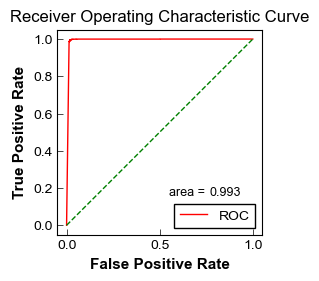

In [23]:
# train results
id = test_id
img_folder = f'results/{test_id}'
pred_valid.shape

xaxis = y_valid
yaxis = pred_valid

#num = 6
#fpr, tpr, thresholds = roc_curve(xaxis[num],yaxis[num])
#auc = round(roc_auc_score(xaxis[num],yaxis[num]),3)

fpr, tpr, thresholds = roc_curve(xaxis,yaxis)
auc = round(roc_auc_score(xaxis,yaxis), 3)
plot_roc_curve_valid(fpr, tpr, folder=img_folder, auc_score=auc)

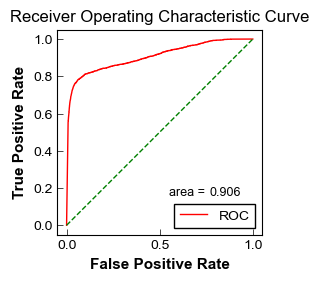

In [24]:
# train results

result_folder = f'results/{test_id}'
#pred_train.shape

xaxis = y_test
yaxis = pred_test

#num = 6
#fpr, tpr, thresholds = roc_curve(xaxis[num],yaxis[num])
#auc = round(roc_auc_score(xaxis[num],yaxis[num]),3)

fpr, tpr, thresholds = roc_curve(xaxis,yaxis)
auc = round(roc_auc_score(xaxis,yaxis), 3)
plot_roc_curve_test(fpr, tpr, folder=result_folder, auc_score=auc)

In [25]:
pred_test.shape

(320000, 1)

In [26]:
plot_test = pred_test.reshape(2, 400, 400)

In [27]:
test_id = id

In [28]:
result_folder = f'results/{test_id}'

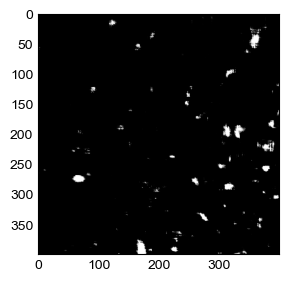

In [31]:
# plt.imshow(plot_test[0], cmap='gray')
plt.imshow(plot_test[1], cmap='gray')
plt.savefig(f'{result_folder}/result_test_likelihood{test_id}_1.png')

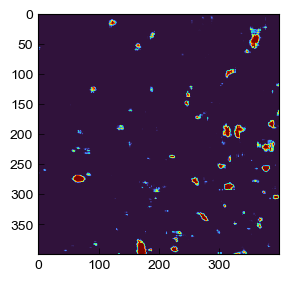

In [32]:
plt.imshow(plot_test[1], cmap='turbo')
plt.savefig(f'{result_folder}/result_test_likelihood_turbo{test_id}_1.png')

In [43]:
num = plot_test.reshape(160000)

res = []

for i in range(len(num)):
    if num[i] < 0.5:
        res.append(0)
    else:
        res.append(1)
np.array(res).shape

(160000,)

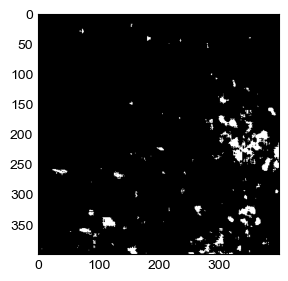

In [44]:
plt.imshow(np.array(res).reshape(400,400), cmap='gray')
plt.savefig(f'{result_folder}/result_test_binary{id}_0.png')

In [32]:
y_test.shape

(320000, 1)

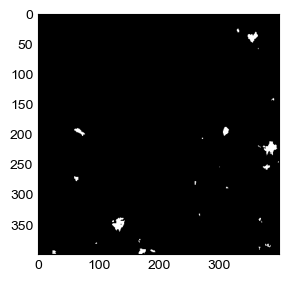

In [34]:
plt.imshow(y_test.reshape(2, 400, 400)[1], cmap='gray')
#plt.imshow(y_test.reshape(2, 400, 400), cmap='gray')
plt.savefig(f'{result_folder}/result_test_ground_truth{id}_1.png')

### FCN

In [17]:
plot=pred_train.reshape(36,100,100)

In [539]:
plot[0]

array([[0.00120517, 0.00100819, 0.00087854, ..., 0.00093205, 0.00113586,
        0.00098815],
       [0.00092633, 0.00091139, 0.00088325, ..., 0.00092239, 0.00091887,
        0.00108482],
       [0.00088894, 0.00083325, 0.00086338, ..., 0.00103008, 0.00090413,
        0.00085245],
       ...,
       [0.00088869, 0.00090602, 0.00095996, ..., 0.00088493, 0.00092238,
        0.00112317],
       [0.00083348, 0.00096975, 0.00087658, ..., 0.00083906, 0.00087945,
        0.00088879],
       [0.0010697 , 0.00088238, 0.00090792, ..., 0.00091429, 0.00091463,
        0.00096733]], dtype=float32)

In [540]:
plot[0].shape

(100, 100)

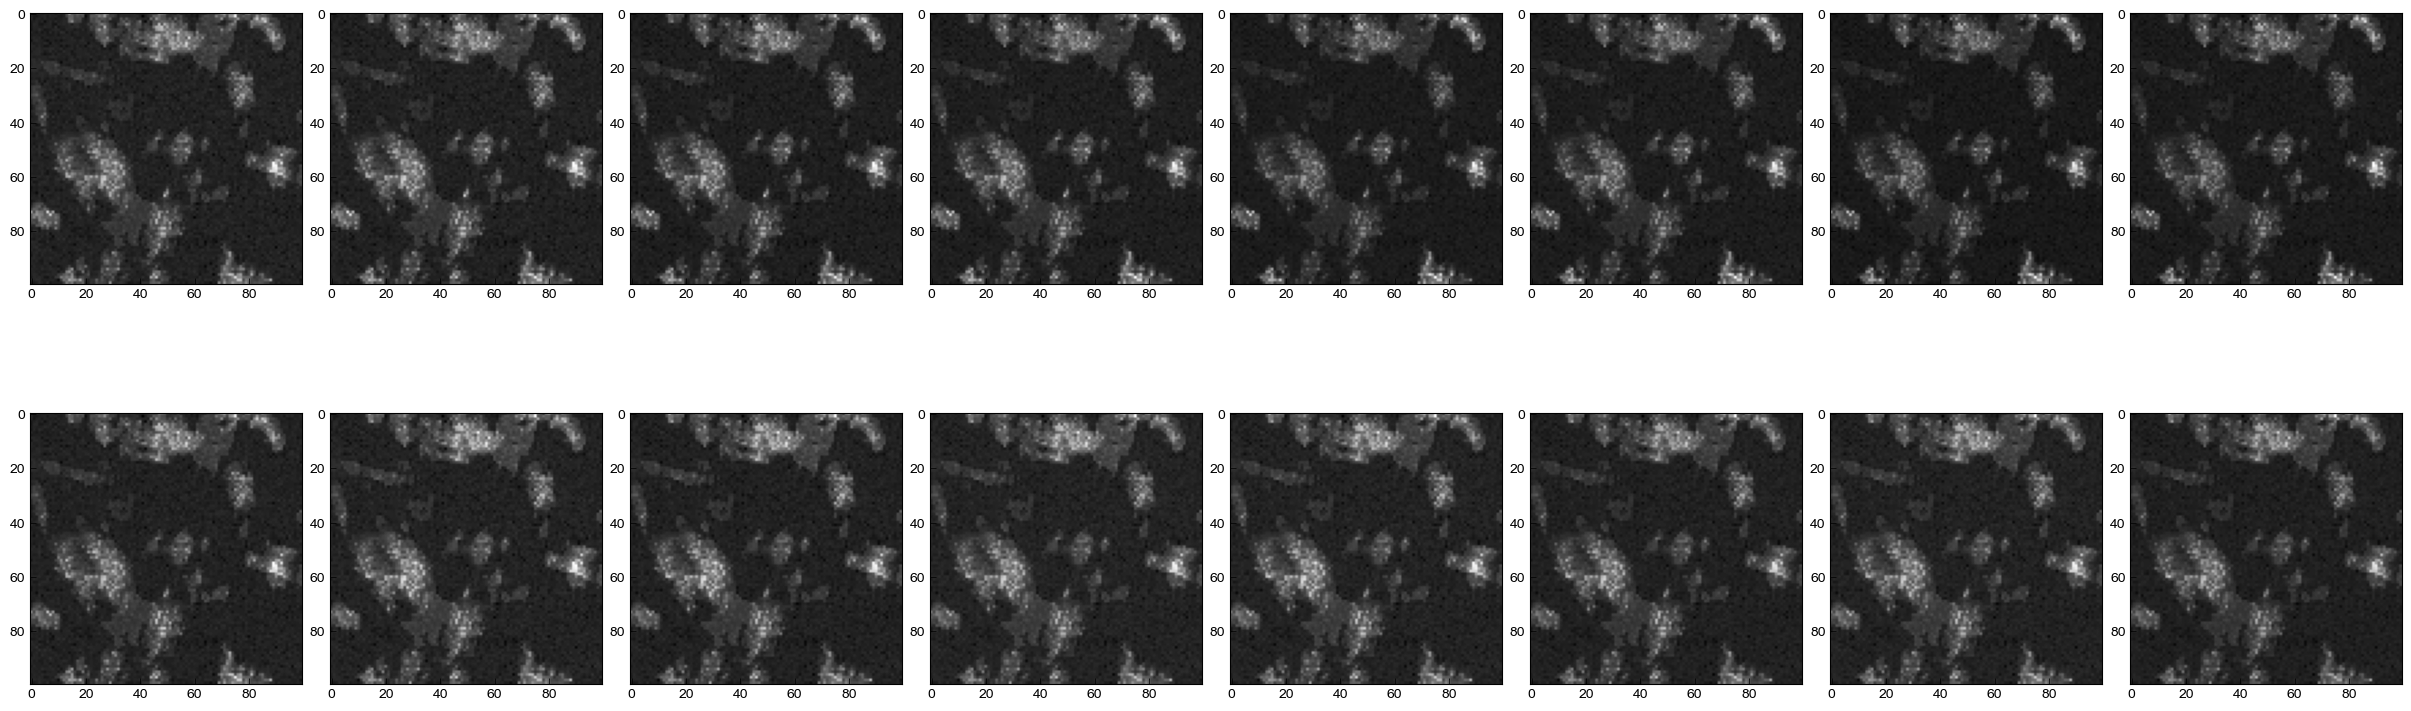

In [18]:
fig = plt.figure(figsize=(24,8))

for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(plot[i], cmap='gray')
    
    i = i+1
    
plt.savefig(f'1018/train_{id}')

In [19]:
plot_test = pred_test.reshape(8,100,100)

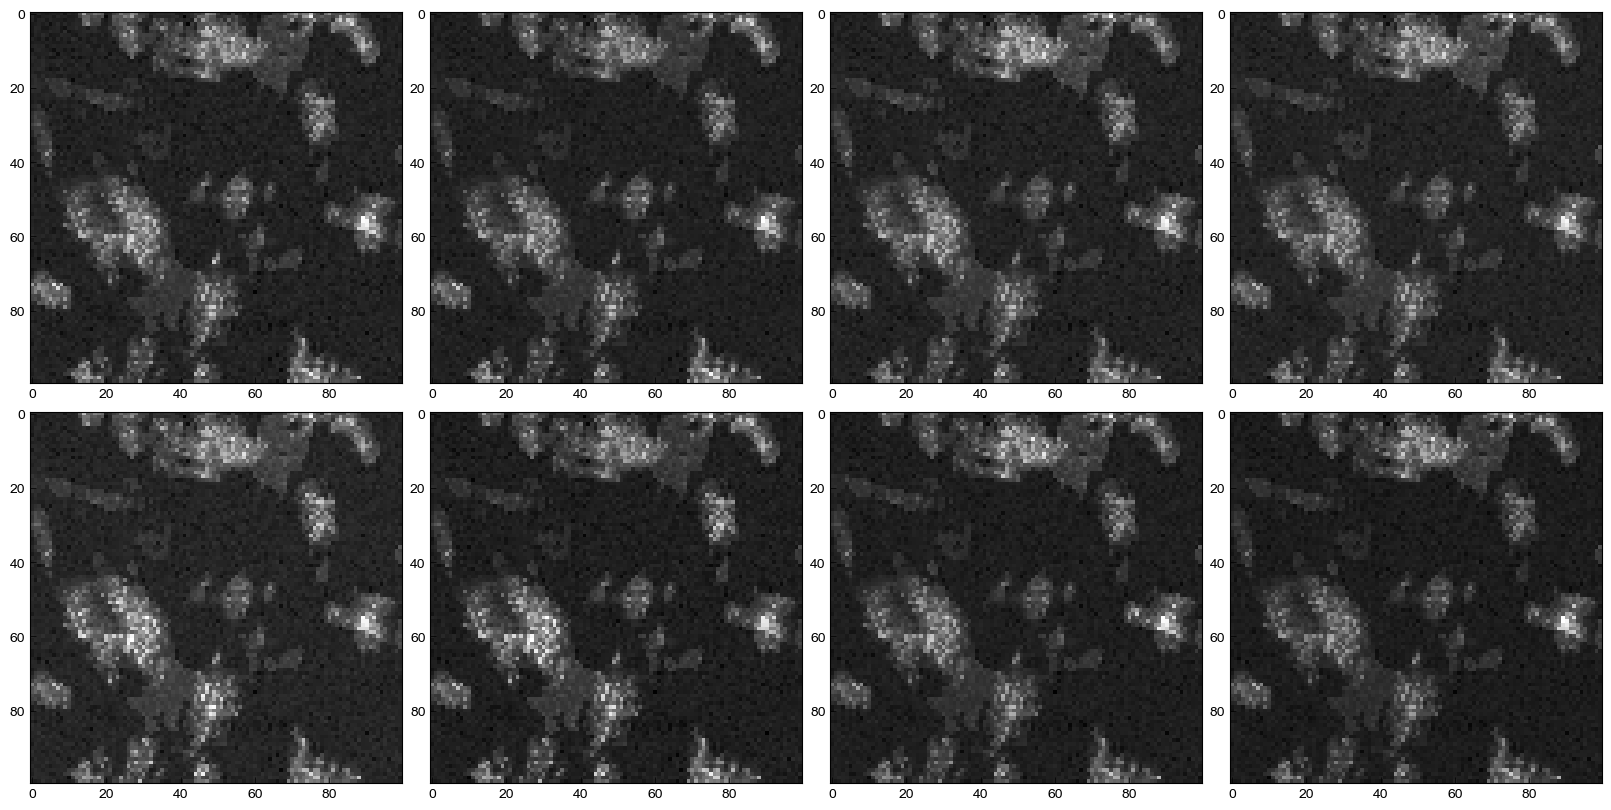

In [20]:
fig = plt.figure(figsize=(16,8))

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(plot_test[i], cmap='gray')
    
plt.savefig(f'1018/sigmoid_{id}.png')

In [545]:
y_test.shape

(8, 1, 1, 10000)

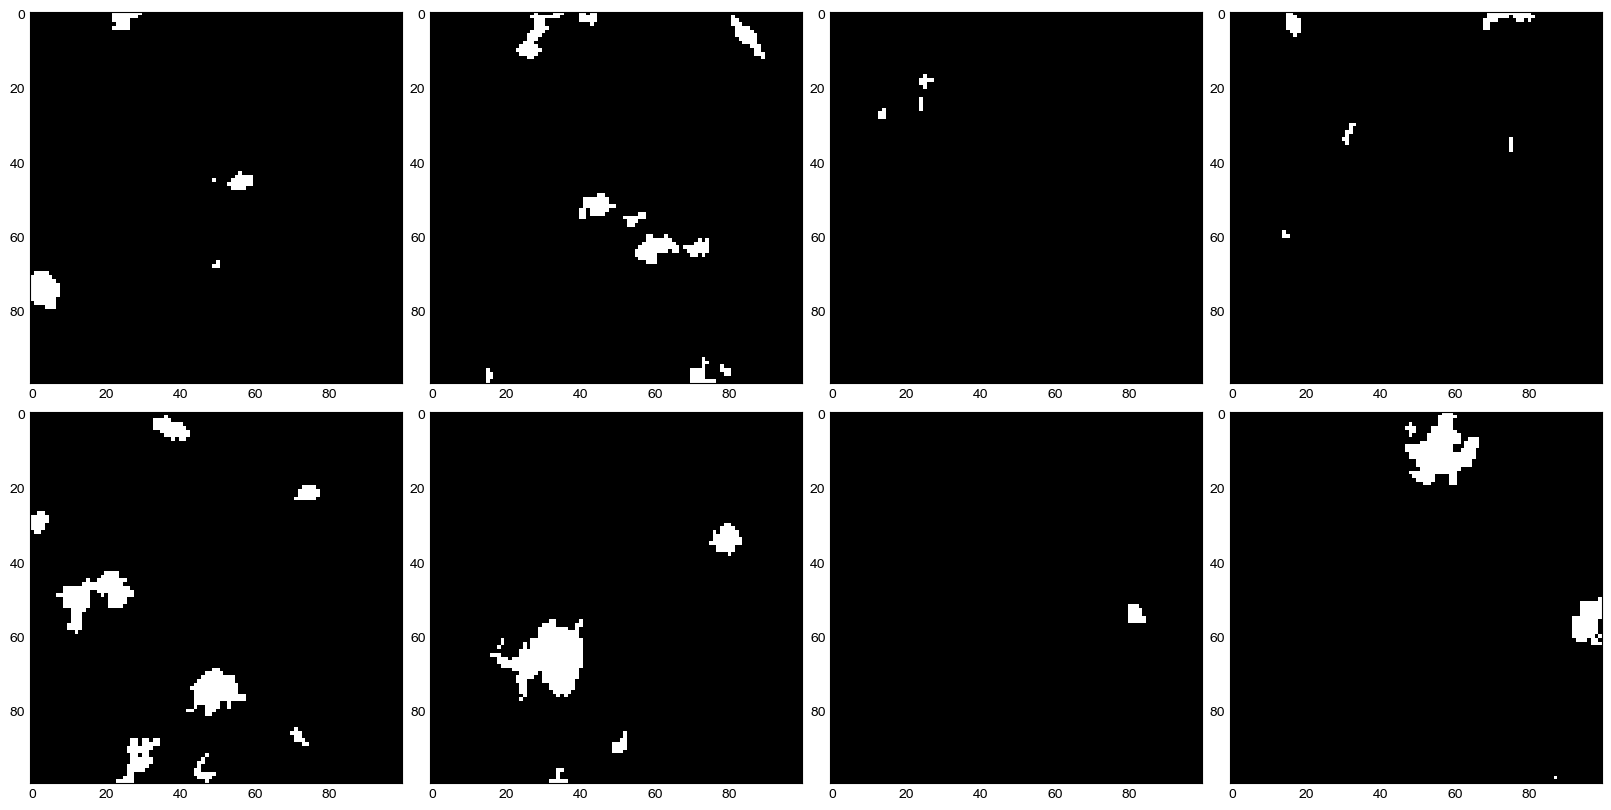

In [547]:
fig = plt.figure(figsize=(16,8))

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(y_test[i].reshape(100,100), cmap='gray')
    
plt.savefig(f'1018/test_{id}.png')

In [264]:
plot_test = pred_test.reshape(100,100)

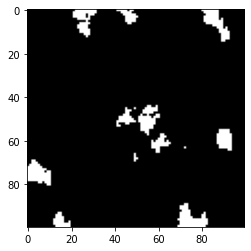

In [265]:
plt.imshow(plot_test, cmap='gray')

# Evaluation

## ROC curve

In [23]:
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

### define

In [24]:
def plot_roc_curve(fper, tper, folder, auc_score):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot(figsize=(8,8))
    ax.set_aspect('equal')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.text(0.55, 0.16, 'area =  ')
    plt.text(0.77, 0.16, auc_score)
    plt.legend()
    plt.savefig(f'{folder}/roc_curve__test{id}.png')
    plt.show()

### use

In [26]:
y_test.shape, #pred_test.shape

((320000, 1),)

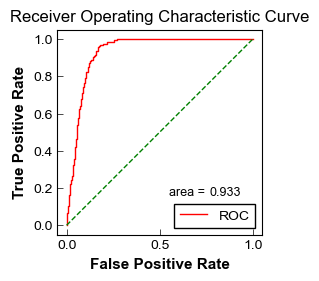

In [23]:
# train results

result_folder = '1018'
pred_train.shape

xaxis = y_train.reshape(36,10000)
yaxis = pred_train.reshape(36,10000)

num = 6

fpr, tpr, thresholds = roc_curve(xaxis[num],yaxis[num])
auc = round(roc_auc_score(xaxis[num],yaxis[num]),3)

plot_roc_curve(fpr, tpr, folder=result_folder, auc_score=auc)

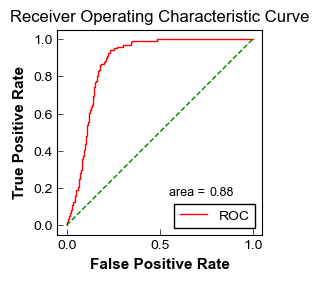

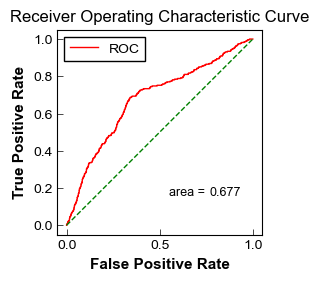

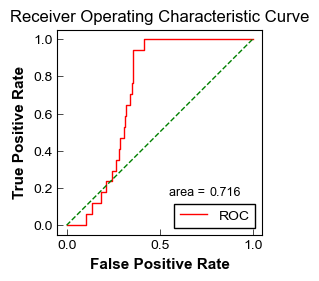

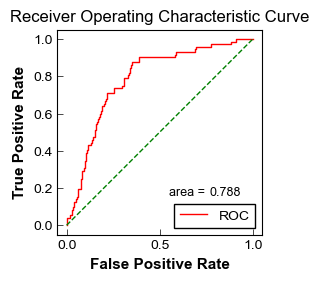

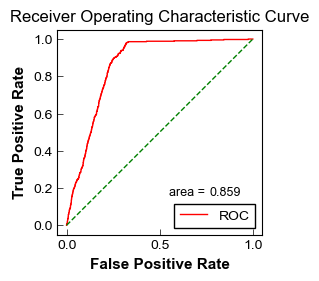

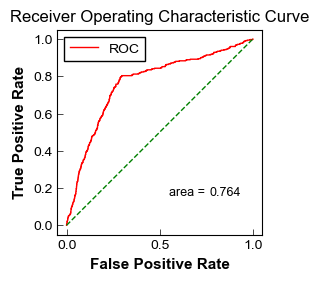

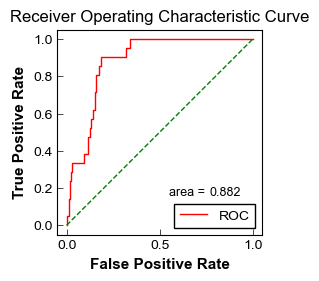

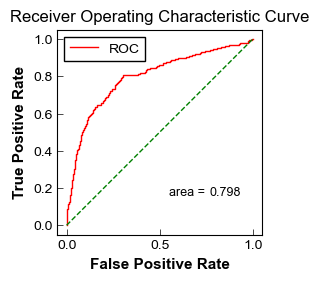

(8, 10000) (8, 10000)


In [25]:
#test results
result_folder = '1018'



x = y_test.reshape(8,10000)
y = pred_test.reshape(8,10000)

for i in range(8):  
    ax = fig.add_subplot(2,4,i+1)
    fpr, tpr, thresholds = roc_curve(x[i], y[i])
    auc = round(roc_auc_score(x[i], y[i]),3)
    
    plot_roc_curve(fpr, tpr, folder=result_folder, auc_score=auc)

print(x.shape, y.shape)


# CAM

In [367]:
from keras.layers.core import Lambda

In [375]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 92, 92, 20)        1640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 20)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 46, 46, 20)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 50)        81050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 50)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 19, 19, 50)        0

In [359]:
x_test[2390].shape

(100, 100, 1)

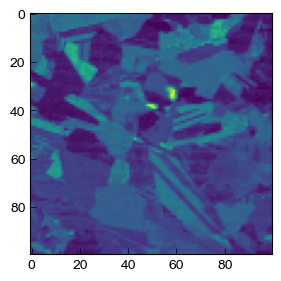

In [360]:
plt.imshow(x_test[2390])

In [384]:
def target_category_loss(x, category_index, nb_classes):
    return tf.multiply(x, K.one_hot([category_index], nb_classes))

def target_category_loss_output_shape(input_shape):
    return input_shape

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

def grad_cam(input_model, image, category_index, layer_name):
    '''
    Parameters
    ----------
    input_model : model
        評価するKerasモデル
    image : tuple等
        入力画像(枚数, 縦, 横, チャンネル)
    category_index : int
        入力画像の分類クラス
    layer_name : str
        最後のconv層の後のactivation層のレイヤー名.
        最後のconv層でactivationを指定していればconv層のレイヤー名.
        batch_normalizationを使う際などのようなconv層でactivationを指定していない場合は、
        そのあとのactivation層のレイヤー名.

    Returns
    ----------
    cam : tuple
        Grad-Camの画像
    heatmap : tuple
        ヒートマップ画像
    '''
    # 分類クラス数
    nb_classes = 1

    # ----- 1. 入力画像の予測クラスを計算 -----

    # 入力のcategory_indexが予想クラス

    # ----- 2. 予測クラスのLossを計算 -----

    # 入力データxのcategory_indexで指定したインデックス以外を0にする処理の定義
    target_layer = lambda x: target_category_loss(x, category_index, nb_classes)

    # 引数のinput_modelの出力層の後にtarget_layerレイヤーを追加
    # modelのpredictをすると予測クラス以外の値は0になる
    x = input_model.layers[-1].output
    x = Lambda(target_layer, output_shape=target_category_loss_output_shape)(x)
    model = keras.models.Model(input_model.layers[0].input, x)

    # 予測クラス以外の値は0なのでsumをとって予測クラスの値のみ抽出
    loss = K.sum(model.layers[-1].output)
    # 引数のlayer_nameのレイヤー(最後のconv層)のoutputを取得する
    #conv_output = [l for l in model.layers if l.name is layer_name][0].output
    conv_output = input_model.get_layer(layer_name).output

    # ----- 3. 予測クラスのLossから最後のconv層への逆伝搬(勾配)を計算 -----

    # 予想クラスの値から最後のconv層までの勾配を計算する関数を定義
    # 定義した関数の
    # 入力 : [判定したい画像.shape=(1, 224, 224, 3)]、
    # 出力 : [最後のconv層の出力値.shape=(1, 14, 14, 512), 予想クラスの値から最後のconv層までの勾配.shape=(1, 14, 14, 512)]
    grads = normalize(tf.GradientTape.gradient(loss, conv_output)[0])
    gradient_function = K.function([model.layers[0].input], [conv_output, grads])

    # 定義した勾配計算用の関数で計算し、データの次元を整形
    # 整形後
    # output.shape=(14, 14, 512), grad_val.shape=(14, 14, 512)
    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    # ----- 4. 最後のconv層のチャンネル毎に勾配を平均を計算して、各チャンネルの重要度(重み)とする -----

    # weights.shape=(512, )
    # cam.shape=(14, 14)
    # ※疑問点1：camの初期化はzerosでなくて良いのか?
    weights = np.mean(grads_val, axis = (0, 1))
    cam = np.ones(output.shape[0 : 2], dtype = np.float32)
    #cam = np.zeros(output.shape[0 : 2], dtype = np.float32)    # 私の自作モデルではこちらを使用

    # ----- 5. 最後のconv層の順伝搬の出力にチャンネル毎の重みをかけて、足し合わせて、ReLUを通す -----

    # 最後のconv層の順伝搬の出力にチャンネル毎の重みをかけて、足し合わせ
    for i, w in enumerate(weights):
        cam += w * output[:, :, i]

    # 入力画像のサイズにリサイズ(14, 14) → (224, 224)
    cam = cv2.resize(cam, (224, 224))
    # 負の値を0に置換。処理としてはReLUと同じ。
    cam = np.maximum(cam, 0)
    # 値を0~1に正規化。
    # ※疑問2 : (cam - np.min(cam))/(np.max(cam) - np.min(cam))でなくて良いのか?
    heatmap = cam / np.max(cam)
    #heatmap = (cam - np.min(cam))/(np.max(cam) - np.min(cam))    # 私の自作モデルではこちらを使用

    # ----- 6. 入力画像とheatmapをかける -----

    # 入力画像imageの値を0~255に正規化. image.shape=(1, 224, 224, 3) → (224, 224, 3)
    #Return to BGR [0..255] from the preprocessed image
    image = image[0, :]
    image -= np.min(image)
    # ※疑問3 : np.uint8(image / np.max(image))でなくても良いのか?
    image = np.minimum(image, 255)

    # heatmapの値を0~255にしてカラーマップ化(3チャンネル化)
    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    # 入力画像とheatmapの足し合わせ
    cam = np.float32(cam) + np.float32(image)
    # 値を0~255に正規化
    cam = 255 * cam / np.max(cam)
    return np.uint8(cam), heatmap

In [385]:
preprocessed_input = x_test[2390].reshape(1, 100, 100, 1)

predictions = model.predict(preprocessed_input)
predicted_class = np.argmax(predictions)
predictions, predicted_class
cam, heatmap = grad_cam(model, preprocessed_input, predicted_class, 'conv2d')

TypeError: gradient() missing 1 required positional argument: 'sources'

In [357]:
def grad_cam(input_model, image, cls, layer_name):
    y_c = input_model.output[0, cls]
    conv_output = input_model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]

    output, grads_val =  K.function([input_model.input], [conv_output, grads])([image])
    print('output.shape=', output.shape)
    print('grads_val.shape=', grads_val.shape)
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis=(0, 1))
    print('weights.shape=', weights.shape)
    cam = np.dot(output, weights)
    print('cam.shape=', cam.shape)

    # Process CAM
    cam = cv2.resize(cam, (W, H), cv2.INTER_LINEAR)
    print('cam_new.shape=', cam.shape)
    cam = np.maximum(cam, 0)

    cam = cam / cam.max()
    return cam

# Grad-CAM

In [49]:
from keras.preprocessing.image import img_to_array, array_to_img
import matplotlib.cm as cm

## 2DCNN 12/15

In [ ]:
def gradcam_heatmap(img_array, model, layer_name, pred_index=None):
    #create model that maps input image to the activations of the last convolutional layer as well as the output predictions
    grad_model = models.Models([model.inputs],,)

## 2DCNN 11/02

In [373]:
from keras.preprocessing.image import load_img, save_img, img_to_array, array_to_img
import matplotlib.cm as cm

In [374]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 93, 93, 20)        1640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 20)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 46, 46, 20)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 50)        81050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 50)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 19, 19, 50)        0

In [375]:
def grad_cam(input_img, model, target_layer, pred_index=None, alpha=0.4):
    grad_model = models.Model([model.inputs], [model.get_layer(target_layer).output, model.output])
    img = np.expand_dims(input_img, axis=0)
    
    with tf.GradientTape() as tape:
        target_layer_output, preds = grad_model(img)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:,pred_index]
    
    grads = tape.gradient(class_channel,target_layer_output)
    print(grads.shape)
    weights = tf.reduce_mean(grads,axis=(0,1,2)) # αの計算
    
    cam = target_layer_output[0] @ weights[...,tf.newaxis] # α * A^k
    cam = tf.squeeze(cam) # reduce dimensions
    
    # ReLU and normalize
    heatmap = tf.maximum(cam, 0) / tf.math.reduce_max(cam)
        
    #coloring
    heatmap = np.uint8(255*heatmap) # rescale to range 0-255
    
    jet = cm.get_cmap('jet')
    
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    print(jet_heatmap.shape)

    # Create an image with RGB colorized heatmap
    jet_heatmap = array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[2]))
    
    jet_heatmap = img_to_array(jet_heatmap)
    print(jet_heatmap.shape)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img[0]
    superimposed_img = array_to_img(superimposed_img)
    
    output_image = superimposed_img
    
    return output_image
    #return jet_heatmap

In [446]:
start_time = time.time()

#settings
target_layer = 'conv2d'
index = 71835
print(y_test[index], pred_test[index])

# rotation or not
rot=True
if rot==True:
    image = x_test[index]
    pre_rot = image.reshape(101, 101)
    rot90 = cv2.rotate(pre_rot, cv2.ROTATE_90_CLOCKWISE).reshape(101,101,1)
    rot180 = cv2.rotate(pre_rot, cv2.ROTATE_180).reshape(101,101,1)
    rot270 = cv2.rotate(pre_rot, cv2.ROTATE_90_COUNTERCLOCKWISE).reshape(101,101,1)
    pred_90 = model.predict(rot90.reshape(1, 101, 101, 1), verbose=0)
    pred_180 = model.predict(rot180.reshape(1, 101, 101, 1), verbose=0)
    pred_270 = model.predict(rot270.reshape(1, 101, 101, 1), verbose=0)
    pred_360 = model.predict(image.reshape(1, 101, 101, 1), verbose=0)
    cam90 = grad_cam(rot90, model, target_layer)
    cam180 = grad_cam(rot180, model, target_layer)
    cam270 = grad_cam(rot270, model, target_layer)
    cam360 = grad_cam(image, model, target_layer)
    print(pred_90, pred_180, pred_270, pred_360)
else:
    image = x_test[index]
    cam = grad_cam(image, model, target_layer)

print('Calculation Complete')


end_time = time.time()
elapsed_time = end_time-start_time
print(elapsed_time)

[0.] [0.891734]


ValueError: cannot reshape array of size 51005 into shape (101,101)

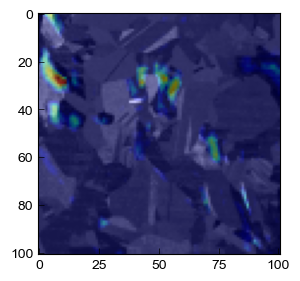

In [390]:
plt.imshow(cam360)
plt.savefig(f'results/{id}/cams/rot/{index}_{target_layer}_360.png')

In [ ]:
image = x_test[index]
pre_rot = image.reshape(101, 101)
rot90 = cv2.rotate(pre_rot, cv2.ROTATE_90_CLOCKWISE)
rot180 = cv2.rotate(pre_rot, cv2.ROTATE_180)
rot270 = cv2.rotate(pre_rot, cv2.ROTATE_90_COUNTERCLOCKWISE)

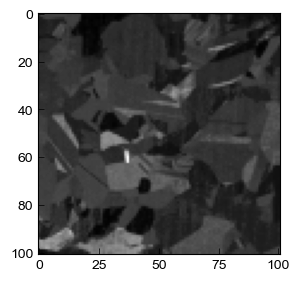

In [395]:
plt.imshow(rot270, cmap='gray')
plt.savefig(f'results/{id}/cams/rot/{index}_oi_270.png')

In [185]:
image = x_test[280392][26:46, 68:88, :]

overlay = array_to_img(cam)
overlay = overlay.resize((20,20))

overlay = img_to_array(overlay)
superimposed = overlay * 0.4 + image
print(superimposed.shape)
output = array_to_img(superimposed)

#output = output.resize((1,101))
#jet_heatmap = array_to_img(jet_heatmap)
    #jet_heatmap = jet_heatmap.resize((img.shape[1]-24, img.shape[2]))
    
    #jet_heatmap = img_to_array(jet_heatmap)
    #print(jet_heatmap.shape)

    # Superimpose the heatmap on original image
    #superimposed_img = jet_heatmap * alpha + img[0]
    #superimposed_img = array_to_img(superimposed_img)
    
    #output_image = superimposed_img

NameError: name 'cam' is not defined

In [ ]:
plt.xticks(np.arange(0, 20, step=5))
plt.yticks(np.arange(0, 20, step=5))
plt.imshow(output)
#plt.savefig(f'results/{id}/cams/processed_{index}_{target_layer}____.png')

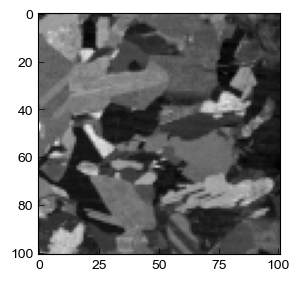

In [695]:
plt.imshow(x_test[280392],cmap='gray')

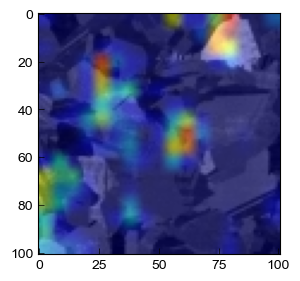

In [57]:
plt.imshow(cam)

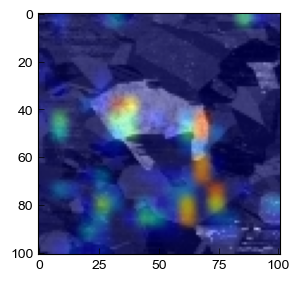

In [541]:
plt.imshow(cam)

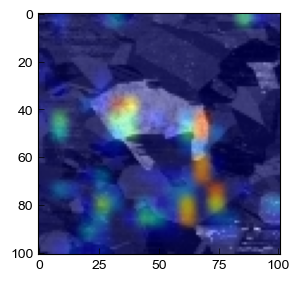

In [542]:
plt.imshow(cam)
plt.savefig(f'results/{id}/cams/trueDC/{index}_{target_layer}.png')

In [226]:
# show corresponding optical image


In [ ]:
## rotation

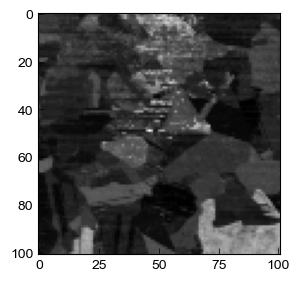

In [215]:
# rotated image
index = 316566
image = x_test[index].reshape(101, 101)
#deg = 90
#w, h = im_size[0], im_size[1]
#m = cv2.getRotationMatrix2D((w/2,h/2), deg, 1)

#rot_img = cv2.warpAffine(pre_rot, m, (w,h), borderMode=cv2.BORDER_REPLICATE)

rot_img = cv2.rotate(image, cv2.ROTATE_180)
plt.imshow(rot_img, cmap='gray')

### indices

In [51]:
y_test.shape

(320000, 1)

In [52]:
indx_test = np.arange(len(y_test))
bln_trueDC = y_test==1
bln_predDC = pred_test>0.7
indx_trueDC = np.where(bln_trueDC)

In [53]:
indx_trueDC[0].shape

(1895,)

In [59]:
indx_trueDC[0][900:]

array([235659, 235660, 235904, 235905, 235906, 235907, 235908, 235909,
       235910, 235911, 235912, 235913, 235914, 236052, 236053, 236054,
       236055, 236056, 236057, 236058, 236059, 236060, 236061, 236303,
       236304, 236305, 236306, 236307, 236308, 236309, 236313, 236452,
       236453, 236454, 236455, 236456, 236457, 236458, 236459, 236460,
       236461, 236704, 236705, 236706, 236707, 236708, 236709, 236710,
       236711, 236712, 236853, 236854, 236855, 236856, 236857, 236858,
       236859, 236860, 236861, 236862, 237104, 237105, 237106, 237107,
       237108, 237109, 237110, 237111, 237112, 237258, 237259, 237260,
       237261, 237262, 237507, 237508, 237509, 237510, 237511, 237659,
       237660, 237661, 237662, 237663, 237908, 237909, 237910, 238060,
       238061, 238062, 238063, 238309, 238461, 238462, 238463, 238709,
       239130, 239131, 239132, 239530, 239531, 239929, 239930, 239931,
       240330, 240331, 240332, 240731, 242782, 242783, 242790, 243180,
      

In [90]:
pred_test[43571]

array([0.30857876], dtype=float32)

In [100]:
indx_trueDC[0][0]

43571

In [101]:
dislocations = len(indx_trueDC[0])
est = []
for i in range(dislocations):
    index = int(indx_trueDC[0][i])
    value = pred_test[index]
    est.append(value)
    
est

[array([0.30857876], dtype=float32),
 array([0.48337647], dtype=float32),
 array([0.5492932], dtype=float32),
 array([0.6007285], dtype=float32),
 array([0.5116297], dtype=float32),
 array([0.6049715], dtype=float32),
 array([0.69136494], dtype=float32),
 array([0.7600581], dtype=float32),
 array([0.7940299], dtype=float32),
 array([0.74303347], dtype=float32),
 array([0.77042836], dtype=float32),
 array([0.7960115], dtype=float32),
 array([0.74477845], dtype=float32),
 array([0.78190786], dtype=float32),
 array([0.80021435], dtype=float32),
 array([0.6982248], dtype=float32),
 array([0.7327606], dtype=float32),
 array([0.7583725], dtype=float32),
 array([0.7067173], dtype=float32),
 array([0.73483866], dtype=float32),
 array([0.749376], dtype=float32),
 array([0.6894911], dtype=float32),
 array([0.7031913], dtype=float32),
 array([0.67359036], dtype=float32),
 array([0.6724371], dtype=float32),
 array([0.79675335], dtype=float32),
 array([0.81839925], dtype=float32),
 array([0.8214143

## 3DCNN 11/07

In [68]:
test_id = id

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 93, 93, 5, 20)     1640      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 46, 46, 5, 20)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 46, 46, 5, 20)     0         
                                                                 
 conv3d_1 (Conv3D)           (None, 38, 38, 1, 50)     405050    
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 19, 19, 1, 50)    0         
 3D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 19, 19, 1, 50)     0

In [50]:
def grad_cam(img, model, target_layer, pred_index, alpha=0.4):
    grad_model = models.Model([model.inputs], [model.get_layer(target_layer).output, model.output])
    
    with tf.GradientTape() as tape:
        target_layer_output, preds = grad_model(img)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:,pred_index]
    
    grads = tape.gradient(class_channel,target_layer_output)
    print(grads.shape)
    weights = tf.reduce_mean(grads,axis=(0,1,2)) # αの計算
    print(weights.shape)
    cam = target_layer_output[0] @ weights[...,tf.newaxis] # α * A^k
    cam = tf.squeeze(cam) # reduce dimensions
    
    # ReLU and normalize
    heatmap = tf.maximum(cam, 0) / tf.math.reduce_max(cam)
        
    #coloring
    heatmap = np.uint8(255*heatmap) # rescale to range 0-255
    jet = cm.get_cmap('jet')
    
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[2]))
    
    jet_heatmap = img_to_array(jet_heatmap)
    print(jet_heatmap.shape)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img[0][:,:,4:]
    superimposed_img = array_to_img(superimposed_img)
    
    output_image = superimposed_img
    
    return output_image
    #return jet_heatmap
    #return heatmap.numpy()

In [51]:
x_test.shape

(320000, 101, 101, 5)

In [638]:
start_time = time.time()

target_layer = 'conv3d_1'
index =242061
print(y_test[index], pred_test[index])
image = x_test[index].reshape(1, 101, 101, 5)
#image = rot_img.reshape(1, 101, 101, 1)
#cam_calc = x_test.reshape(20000, 100, 100, 1)
pred_index = None

cam = grad_cam(image, model, target_layer, pred_index)

#for i in range(8):        
#    cam = grad_cam(model, target_img[i, :, :, :], target_layer)
#    
#    cams.append(cam)
#    i = i+1

print('Calculation Complete')

end_time = time.time()
elapsed_time = end_time-start_time
print(elapsed_time)

[0.] [4.9188814e-10]
(1, 38, 38, 1, 50)
(1, 50)
(101, 101, 3)
Calculation Complete
0.06284451484680176


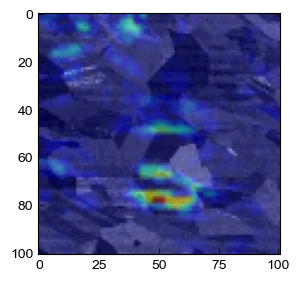

In [639]:
plt.imshow(cam)
#plt.colorbar()
plt.savefig(f'results/{test_id}/cams/true0pred0/{index}_{target_layer}.png')

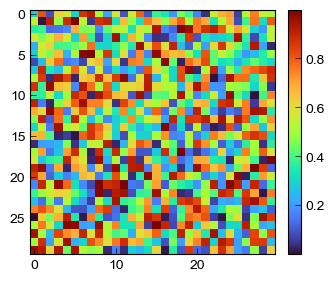

In [4]:
sample = np.random.rand(30, 30)
fig, ax = plt.subplots()
im = ax.imshow(sample, cmap='turbo')
fig.colorbar(im, ax=ax)
plt.savefig(f'results/cbar.png')

In [116]:
x_test[index][:,:,2:].shape

(101, 101, 3)

In [824]:
index = 98696

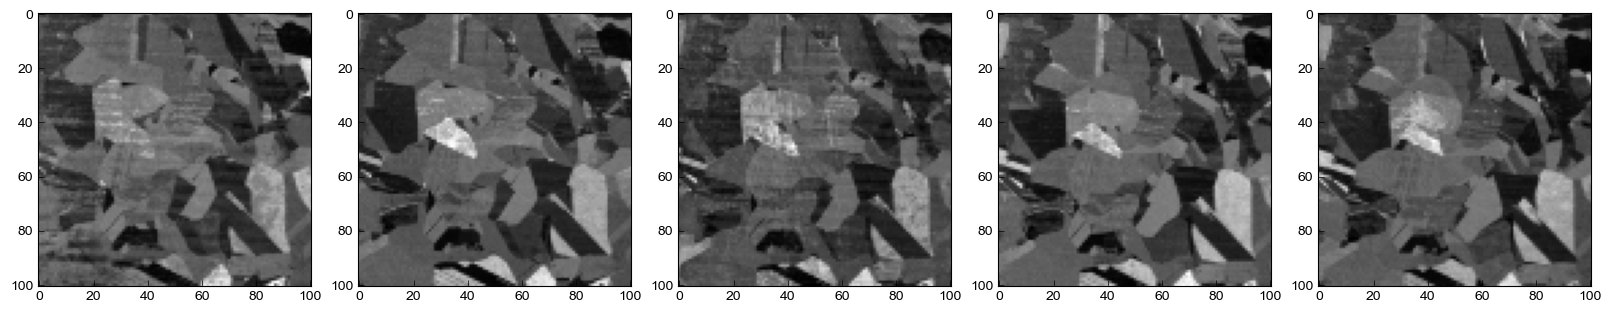

In [825]:
fig = plt.figure(figsize=(16,4))

imgplot=1
plt.subplot(1,5,imgplot)
plt.imshow(x_test[index][:,:,0], cmap='gray')

imgplot=2
plt.subplot(1,5,imgplot)
plt.imshow(x_test[index][:,:,1], cmap='gray')

imgplot=3
plt.subplot(1,5,imgplot)
plt.imshow(x_test[index][:,:,2], cmap='gray')

imgplot=4
plt.subplot(1,5,imgplot)
plt.imshow(x_test[index][:,:,3], cmap='gray')

imgplot=5
plt.subplot(1,5,imgplot)
plt.imshow(x_test[index][:,:,4], cmap='gray')

plt.savefig(f'results/{test_id}/cams/{index}_optical.png')

#plt.imshow(x_test[index][:,:,:3])

In [46]:
# rotated image
index = 123191
top = x_test[index][:,:,0].reshape(101, 101)
mid = x_test[index][:,:,1].reshape(101, 101)
bot = x_test[index][:,:,1].reshape(101, 101)

rot_top = cv2.rotate(top, cv2.ROTATE_180)
rot_mid = cv2.rotate(mid, cv2.ROTATE_180)
rot_bot = cv2.rotate(bot, cv2.ROTATE_180)

restack = np.stack((rot_top, rot_mid, rot_bot), axis=2)
restack.shape
#plt.imshow(rot_img, cmap='gray')

image = restack.reshape(1, 101, 101, 3)
cam = grad_cam(image, model, target_layer, pred_index)

ValueError: Input 0 of layer "model_3" is incompatible with the layer: expected shape=(None, 101, 101, 5, 1), found shape=(1, 101, 101, 3)

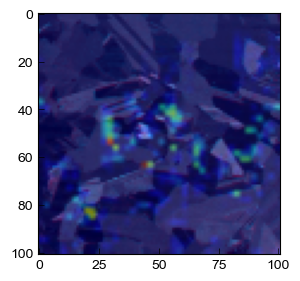

In [79]:
plt.imshow(cam)
plt.savefig(f'results/{test_id}/cams/{index}_{target_layer}_rot180.png')

In [483]:
x_test.shape

(160000, 101, 101, 3)

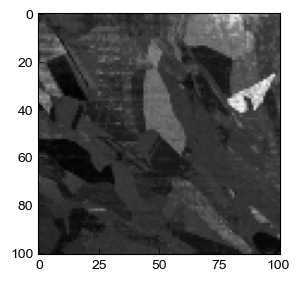

In [486]:
plt.imshow(x_test[index, :, :, 2], cmap='gray')

### get arbitrary area

In [52]:
x_test.shape, y_test.shape

((320000, 101, 101, 5), (320000, 1))

In [53]:
pred_test.shape

(320000, 1)

In [54]:
np.count_nonzero(y_test)

2350

In [55]:
# get index of DC
indx_test = np.arange(len(y_test))
bln_trueDC = y_test==1
bln_predDC = pred_test>0.7
indx_trueDC = np.where(bln_trueDC)

In [56]:
len(indx_trueDC[1])

2350

In [241]:
indx_trueDC[0][1500:]

array([245987, 245988, 245989, 246384, 246385, 246386, 246387, 246388,
       246389, 246784, 246785, 246786, 246787, 246788, 246789, 247183,
       247184, 247185, 247186, 247187, 247188, 247189, 247190, 247583,
       247584, 247585, 247586, 247587, 247588, 247589, 247590, 247591,
       247594, 247982, 247983, 247984, 247985, 247986, 247987, 247988,
       247989, 247990, 247991, 247992, 247993, 247994, 247995, 248365,
       248366, 248374, 248375, 248382, 248383, 248384, 248385, 248386,
       248387, 248388, 248389, 248390, 248391, 248392, 248393, 248394,
       248395, 248766, 248767, 248773, 248774, 248775, 248776, 248778,
       248779, 248780, 248781, 248782, 248783, 248784, 248785, 248786,
       248787, 248788, 248789, 248790, 248791, 248792, 248793, 248794,
       248795, 249168, 249169, 249174, 249175, 249176, 249177, 249178,
       249179, 249180, 249181, 249182, 249183, 249184, 249185, 249186,
       249187, 249188, 249189, 249190, 249191, 249192, 249193, 249194,
      

(array([0.]), array([0.06422601], dtype=float32))

## CNN

In [296]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 92, 92, 20)        1640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 20)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 46, 46, 20)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 50)        81050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 50)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 19, 19, 50)        0

In [297]:
x_test.shape

(20000, 100, 100, 1)

In [318]:
#define method

def grad_cam(input_model, x, layer_name):
    """
    Args:
        input_model(object): モデルオブジェクト
        x(ndarray): 画像
        layer_name(string): 畳み込み層の名前
    Returns:
        output_image(ndarray): 元画像に色付けした画像
    """
    
    #preparation
    X = np.expand_dims(x, axis=0)
    preprocessed_input = X.astype('float32')/255.0
    #preprocessed_input = x.astype('float32')/255.0
    
    grad_model = models.Model([input_model.inputs], [input_model.get_layer(layer_name).output, input_model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(preprocessed_input)
        #class_idx = np.argmax(predictions[0])
        class_idx = 0
        loss = predictions[:, class_idx]
    
    
    #calculate gradients
    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    
    gate_f = tf.cast(output>0, 'float32')
    gate_r = tf.cast(grads>0, 'float32')
    
    guided_grads = gate_f * gate_r * grads
    
    
    #print('output.shape=', output.shape)
    
    #average weights and multiply to layer output
    weights  = np.mean(guided_grads, axis=(0,1))[0]
    #print('weights.shape=', weights.shape)
    cam = np.dot(output, weights)
    #print(cam.shape)
    
    # rearrange img scales
    cam = cv2.resize(cam, im_size, cv2.INTER_LINEAR)
    
    # substitute to ReLU
    cam = np.maximum(cam, 0)
    
    # get heatmap
    heatmap = cam / cam.max()
    #heatmap = (cam - cam.min())/(cam.max()-cam.min())
    
    
    #coloring
    #jet_cam = cv2.applyColorMap(np.uint8(255.0*heatmap), cv2.COLORMAP_JET)
    #rgb_cam = cv2.cvtColor(jet_cam, cv2.COLOR_BGR2RGB)
    
    #x = np.array([x,x,x,x]).transpose(1,2,0,3)
    
    # apply to original img
    #output_image = (np.float32(rgb_cam) + x / 2) #元画像にヒートマップをマスクするとき使用
    #output_image = (np.float32(jet_cam)) #元画像にマスクせずヒートマップのみ出力

    #return output_image
    return cam   

In [355]:
# define gradcam by keras

def grad_cam(input_model, x, target_layer):
    
    #preprocessed_input = x.astype('float32')/255.0
  
    predictions = input_model.output
    conv_output = input_model.get_layer(target_layer).output
    
    loss = predictions[:, np.argmax(predictions[0])]
    #loss = predictions[:, cls]
    
    grads = tf.GradientTape.gradient(loss, conv_output)[0]
    
    output, grads_val = K.function([input_model.input], [conv_output, grads])([x])
    
    #print('output.shape=', output.shape)
    #print('grads_val.shape=', grads_val.shape)
    
    output, grads_val = output[0, :], grads_val[0, :, :, :]
    
    weights = np.mean(grads_val, axis=(0,1))
    #print('weights.shape=', weights.shape)
    
    cam = np.dot(output, weights)
    #print('cam.shape=', cam.shape)
    
    #process   
    #cam = cv2.resize(cam, (W, H), cv2.INTER_LINEAR)
    #cam = np.maximum(cam, 0)

    #cam = cam/cam.max()

    return weights
    #return cam

In [320]:
x_test.shape

(20000, 100, 100, 1)

In [322]:
pred_test.shape

(20000, 1)

In [324]:
np.max(pred_test)

0.70306164

In [343]:
pred_test[2390]

array([0.6431925], dtype=float32)

In [356]:
#single channel
#calculate grad-cam
start_time = time.time()
print('Calculation start')

target_layer = 'conv2d_2'
#cam_calc = x_test.reshape(40401, 100, 100, 3, 1)
cam_calc = x_test.reshape(20000, 100, 100, 1)
cam = grad_cam(model, cam_calc[2390], target_layer)

#for i in range(8):        
#    cam = grad_cam(model, target_img[i, :, :, :], target_layer)
#    
#    cams.append(cam)
#    i = i+1

print('Calculation Complete')

end_time = time.time()
elapsed_time = end_time-start_time
print(elapsed_time)

Calculation start


TypeError: You are passing KerasTensor(type_spec=TensorSpec(shape=(1,), dtype=tf.float32, name=None), name='tf.__operators__.getitem/strided_slice:0', description="created by layer 'tf.__operators__.getitem'"), an intermediate Keras symbolic input/output, to a TF API that does not allow registering custom dispatchers, such as `tf.cond`, `tf.function`, gradient tapes, or `tf.map_fn`. Keras Functional model construction only supports TF API calls that *do* support dispatching, such as `tf.math.add` or `tf.reshape`. Other APIs cannot be called directly on symbolic Kerasinputs/outputs. You can work around this limitation by putting the operation in a custom Keras layer `call` and calling that layer on this symbolic input/output.

In [312]:
x_test.shape

(20000, 100, 100, 1)

In [ ]:
start_time = time.time()
print('start calculations')

target_layer = 'conv2d_2'
image_num = 0
cams = []

for i in range(blocks**2):        
    cam = grad_cam(model, x_test[image_num, :, :, :], target_layer)
    
    cams.append(cam)
    image_num = image_num+1

end_time = time.time()
elapsed_time = end_time-start_time
print(elapsed_time)

In [ ]:
grads = []
for i in range(blocks**2):
    grad = array_to_img(cams[i])
    grads.append(grad)

In [352]:
np.count_nonzero(weights)

0

In [348]:
grads = array_to_img(cam)

ValueError: Unsupported channel number: 100

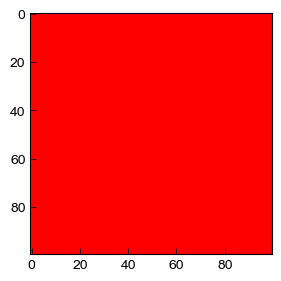

In [307]:
plt.imshow(grads)

## FCN

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 10)      1010      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 10)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 20)        20020     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 20)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 25, 25, 20)       

## appendix

In [58]:
#define method tesnsorflow and keras

def grad_cam(input_model, x, layer_name, output_predictions):
    """
    Args:
        input_model(object): モデルオブジェクト
        x(ndarray): 画像
        layer_name(string): 畳み込み層の名前
    Returns:
        output_image(ndarray): 元画像に色付けした画像
    """
    
    #preparation
    #X = np.expand_dims(x, axis=0)
    #preprocessed_input = X.astype('float32')/255.0
    preprocessed_input = x.astype('float32')/255.0
    
    #grad_model = models.Model([input_model.inputs], [input_model.get_layer(layer_name).output, input_model.output])
    
    
    with tf.GradientTape() as tape:
        #conv_outputs, predictions = grad_model(preprocessed_input)
        conv_outputs = input_model.get_layer(layer_name).output
        #predictions = input_model.output
        predictions = output_predictions
        #class_idx = np.argmax(predictions[0])
        #class_idx = 0
        #loss = predictions[:, class_idx]
        loss = predictions[:, 0]
    
    
    #calculate gradients
    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    
    gate_f = tf.cast(output>0, 'float32')
    gate_r = tf.cast(grads>0, 'float32')
    
    guided_grads = gate_f * gate_r * grads
    
    #average weights and multiply to layer output
    weights  = np.mean(guided_grads, axis=(0,1))
    cam = np.dot(output, weights)
    
    # rearrange img scales
    cam = cv2.resize(cam, im_size, cv2.INTER_LINEAR)
    
    # substitute to ReLU
    cam = np.maximum(cam, 0)
    
    # get heatmap
    #heatmap = cam / cam.max()
    heatmap = (cam - cam.min())/(cam.max()-cam.min())
    
    
    #coloring
    jet_cam = cv2.applyColorMap(np.uint8(255.0*heatmap), cv2.COLORMAP_JET)
    #rgb_cam = cv2.cvtColor(jet_cam, cv2.COLOR_BGR2RGB)
    
    x = np.array([x,x,x,x]).transpose(1,2,0,3)
    
    # apply to original img
    #output_image = (np.float32(rgb_cam) + x / 2) #元画像にヒートマップをマスクするとき使用
    output_image = (np.float32(jet_cam)) #元画像にマスクせずヒートマップのみ出力

    return output_image
        

In [53]:
# define gradcam by keras

def grad_cam(input_model, x, target_layer, output_predictions):
    #predictions_last = input_model.get_layer(last_layer).output
    #args = input_model.get_layer(target_layer).call(predictions_last)
    #loss = args[:, np.argmax(args[0])]
    
    
    #predictions = input_model.output
    predictions = output_predictions
    
    #loss = predictions[:, np.argmax(predictions[0])]
    loss = predictions[:, 0]
    
    conv_output = input_model.get_layer(target_layer).output
    grads = tf.GradientTape.gradient(loss, conv_output)[0]
    
    output, grads_val = K.function([input_model.input], [conv_output, grads])([x])
    
    print('output.shape=', output.shape)
    print('grads_val.shape=', grads_val.shape)
    
    output, grads_val = output[0, :], grads_val[0, :, :, :]
    
    weights = np.mean(grads_val, axis=(0,1))
    print('weights.shape=', weights.shape)
    
    cam = np.dot(output, weights)
    print('cam.shape=', cam.shape)
    
    #process   
    cam = cv2.resize(cam, (W, H), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)

    cam = cam/cam.max()

    return cam

In [22]:
pred_test.shape

(8, 1, 1, 10000)

In [27]:
predictions = model.output
predictions.shape

TensorShape([None, 1, 1, 10000])

In [42]:
class MyMetricLayer(tf.keras.layers.Layer):
  def __init__(self):
    super(MyMetricLayer, self).__init__(name='my_metric_layer')
    self.mean = tf.keras.metrics.Mean(name='metric_1')

  def call(self, inputs):
    self.add_metric(self.mean(inputs))
    self.add_metric(tf.reduce_sum(inputs), name='metric_2')
    return inputs

In [55]:
predictions = pred_test
loss = predictions[:, 0]
loss.shape

(8, 1, 10000)

In [57]:
conv_output = model.get_layer(target_layer).output
conv_output

<KerasTensor: shape=(None, 100, 100, 10) dtype=float32 (created by layer 'conv2d')>

In [53]:
# define gradcam by keras

def grad_cam(input_model, x, target_layer, output_predictions):
    #predictions_last = input_model.get_layer(last_layer).output
    #args = input_model.get_layer(target_layer).call(predictions_last)
    #loss = args[:, np.argmax(args[0])]
    
    
    #predictions = input_model.output
    predictions = output_predictions
    
    #loss = predictions[:, np.argmax(predictions[0])]
    loss = predictions[:, 0]
    
    conv_output = input_model.get_layer(target_layer).output
    grads = tf.GradientTape.gradient(loss, conv_output)[0]
    
    output, grads_val = K.function([input_model.input], [conv_output, grads])([x])
    
    print('output.shape=', output.shape)
    print('grads_val.shape=', grads_val.shape)
    
    output, grads_val = output[0, :], grads_val[0, :, :, :]
    
    weights = np.mean(grads_val, axis=(0,1))
    print('weights.shape=', weights.shape)
    
    cam = np.dot(output, weights)
    print('cam.shape=', cam.shape)
    
    #process   
    cam = cv2.resize(cam, (W, H), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)

    cam = cam/cam.max()

    return cam

In [ ]:
grad_model = models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
conv_outputs, predictions = grad_model(x_test[0, :, :, :])

In [28]:
x_test.shape

(8, 100, 100, 1)

In [32]:
pred_test.shape

(8, 1, 1, 10000)

In [38]:
v = pred_test
v.shape
c = np.argmax(v[0])
c

5589

In [59]:
#single channel
#calculate grad-cam
start_time = time.time()
print('Calculation start')

target_layer = 'conv2d'
#last_layer = 'conv2d_1'
target_img = x_test
#image_num = 0
#cams = []


cam = grad_cam(model, x_test[0, :, :, :], target_layer, pred_test)

#for i in range(8):        
#    cam = grad_cam(model, target_img[i, :, :, :], target_layer)
#    
#    cams.append(cam)
#    i = i+1

print('Calculation Complete')

end_time = time.time()
elapsed_time = end_time-start_time
print(elapsed_time)

Calculation start


AttributeError: 'numpy.ndarray' object has no attribute '_id'

In [ ]:
cam.shape

In [ ]:
# convert to image
grads = []
for i in range(blocks**2):
    grad = array_to_img(cams[i])
    grads.append(grad)

In [ ]:
# convert to image
grads = []
for i in range(blocks**2):
    grad = array_to_img(cams[i])
    grads.append(grad)

### original

In [57]:
# define gradcam by keras

def grad_cam(input_model, x, target_layer):
    #predictions_last = input_model.get_layer(last_layer).output
    #args = input_model.get_layer(target_layer).call(predictions_last)
    #loss = args[:, np.argmax(args[0])]
    
    grad_model = models.Model([input_model.inputs], [input_model.get_layer(layer_name).output, input_model.output])
    predictions = input_model.output
    
    loss = predictions[:, np.argmax(predictions[0])]
    
    conv_output = input_model.get_layer(target_layer).output
    grads = tf.GradientTape.gradient(loss, conv_output)[0]
    
    output, grads_val = K.function([input_model.input], [conv_output, grads])([x])
    
    print('output.shape=', output.shape)
    print('grads_val.shape=', grads_val.shape)
    
    output, grads_val = output[0, :], grads_val[0, :, :, :]
    
    weights = np.mean(grads_val, axis=(0,1))
    print('weights.shape=', weights.shape)
    
    cam = np.dot(output, weights)
    print('cam.shape=', cam.shape)
    
    #process   
    cam = cv2.resize(cam, (W, H), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)

    cam = cam/cam.max()

    return cam